In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

daskoushik_include_path = kagglehub.dataset_download('daskoushik/include')
gautamw7_research_landmarks_path = kagglehub.dataset_download('gautamw7/research-landmarks')
gautamw7_labling_path = kagglehub.dataset_download('gautamw7/labling')
gautamw7_testing_data_path = kagglehub.dataset_download('gautamw7/testing-data')

print('Data source import complete.')


Data source import complete.


In [3]:
import pickle
import numpy as np

# Correct file paths
labels_file = '/kaggle/input/research-landmarks/holistic_labels_videos.pkl'
landmarks_file = '/kaggle/input/research-landmarks/holistic_landmarks_videos.pkl'

rest_labels_file = '/kaggle/input/research-landmarks/rest_DTW_holistic_labels_videos.pkl'
rest_landmarks_file = '/kaggle/input/research-landmarks/rest_DTW_holistic_landmarks_videos.pkl'

# Load original labels and landmarks
with open(labels_file, 'rb') as f:
    labels = pickle.load(f)

with open(landmarks_file, 'rb') as f:
    landmarks = pickle.load(f)

# Load rest labels and landmarks
with open(rest_labels_file, 'rb') as f:
    rest_labels = pickle.load(f)

with open(rest_landmarks_file, 'rb') as f:
    rest_landmarks = pickle.load(f)

# Combine
combined_labels = labels + rest_labels
combined_landmarks = landmarks + rest_landmarks  # if list of arrays; use np.concatenate if it's an array

# Save combined files
with open('combined_labels.pkl', 'wb') as f:
    pickle.dump(combined_labels, f)

with open('combined_landmarks.pkl', 'wb') as f:
    pickle.dump(combined_landmarks, f)

print("✅ Combined files saved as 'combined_labels.pkl' and 'combined_landmarks.pkl'")

# Load rest labels and landmarks
with open(rest_labels_file, 'rb') as f:
    rest_labels = pickle.load(f)

with open(rest_landmarks_file, 'rb') as f:
    rest_landmarks = pickle.load(f)

combined_labels_path = '/kaggle/working/combined_labels.pkl'
combined_landmarks_path = '/kaggle/working/combined_landmarks.pkl'


# Loading the pickle files
with open(combined_landmarks_path, 'rb') as f:
    X = pickle.load(f)  # List of NumPy arrays (one per video)

with open(combined_labels_path, 'rb') as f:
    y = pickle.load(f)  # List of labels (one per video)

# Print shapes and lengths
print(f'Number of videos landmarks sequences: {len(X)}')
for i, landmark_seq in enumerate(X[:5]):  # Print first 5 for inspection
    print(f'Landmark sequence {i} shape: {landmark_seq.shape}')
print(f'Number of labels: {len(y)}')
print(f'Sample labels: {y[:5]}')  # Print first 5 labels

print(f"🔢 Length of X: {len(X)}, Length of y: {len(y)}")

✅ Combined files saved as 'combined_labels.pkl' and 'combined_landmarks.pkl'
Number of videos landmarks sequences: 909
Landmark sequence 0 shape: (57, 1629)
Landmark sequence 1 shape: (69, 1629)
Landmark sequence 2 shape: (63, 1629)
Landmark sequence 3 shape: (53, 1629)
Landmark sequence 4 shape: (62, 1629)
Number of labels: 909
Sample labels: ['10. Mean', '10. Mean', '10. Mean', '10. Mean', '10. Mean']
🔢 Length of X: 909, Length of y: 909


In [4]:
# Check for empty or problematic sequences
bad_indices = []
for i, seq in enumerate(X):
    if seq is None or len(seq) == 0:
        print(f'🚨 Empty sequence at index {i}, Label: {y[i]}')
        bad_indices.append(i)
    elif np.isnan(seq).any():
        print(f'⚠️ NaN values found in sequence at index {i}, Label: {y[i]}')
        bad_indices.append(i)

print(f'\n📌 Total corrupted or empty sequences: {len(bad_indices)}')



📌 Total corrupted or empty sequences: 0


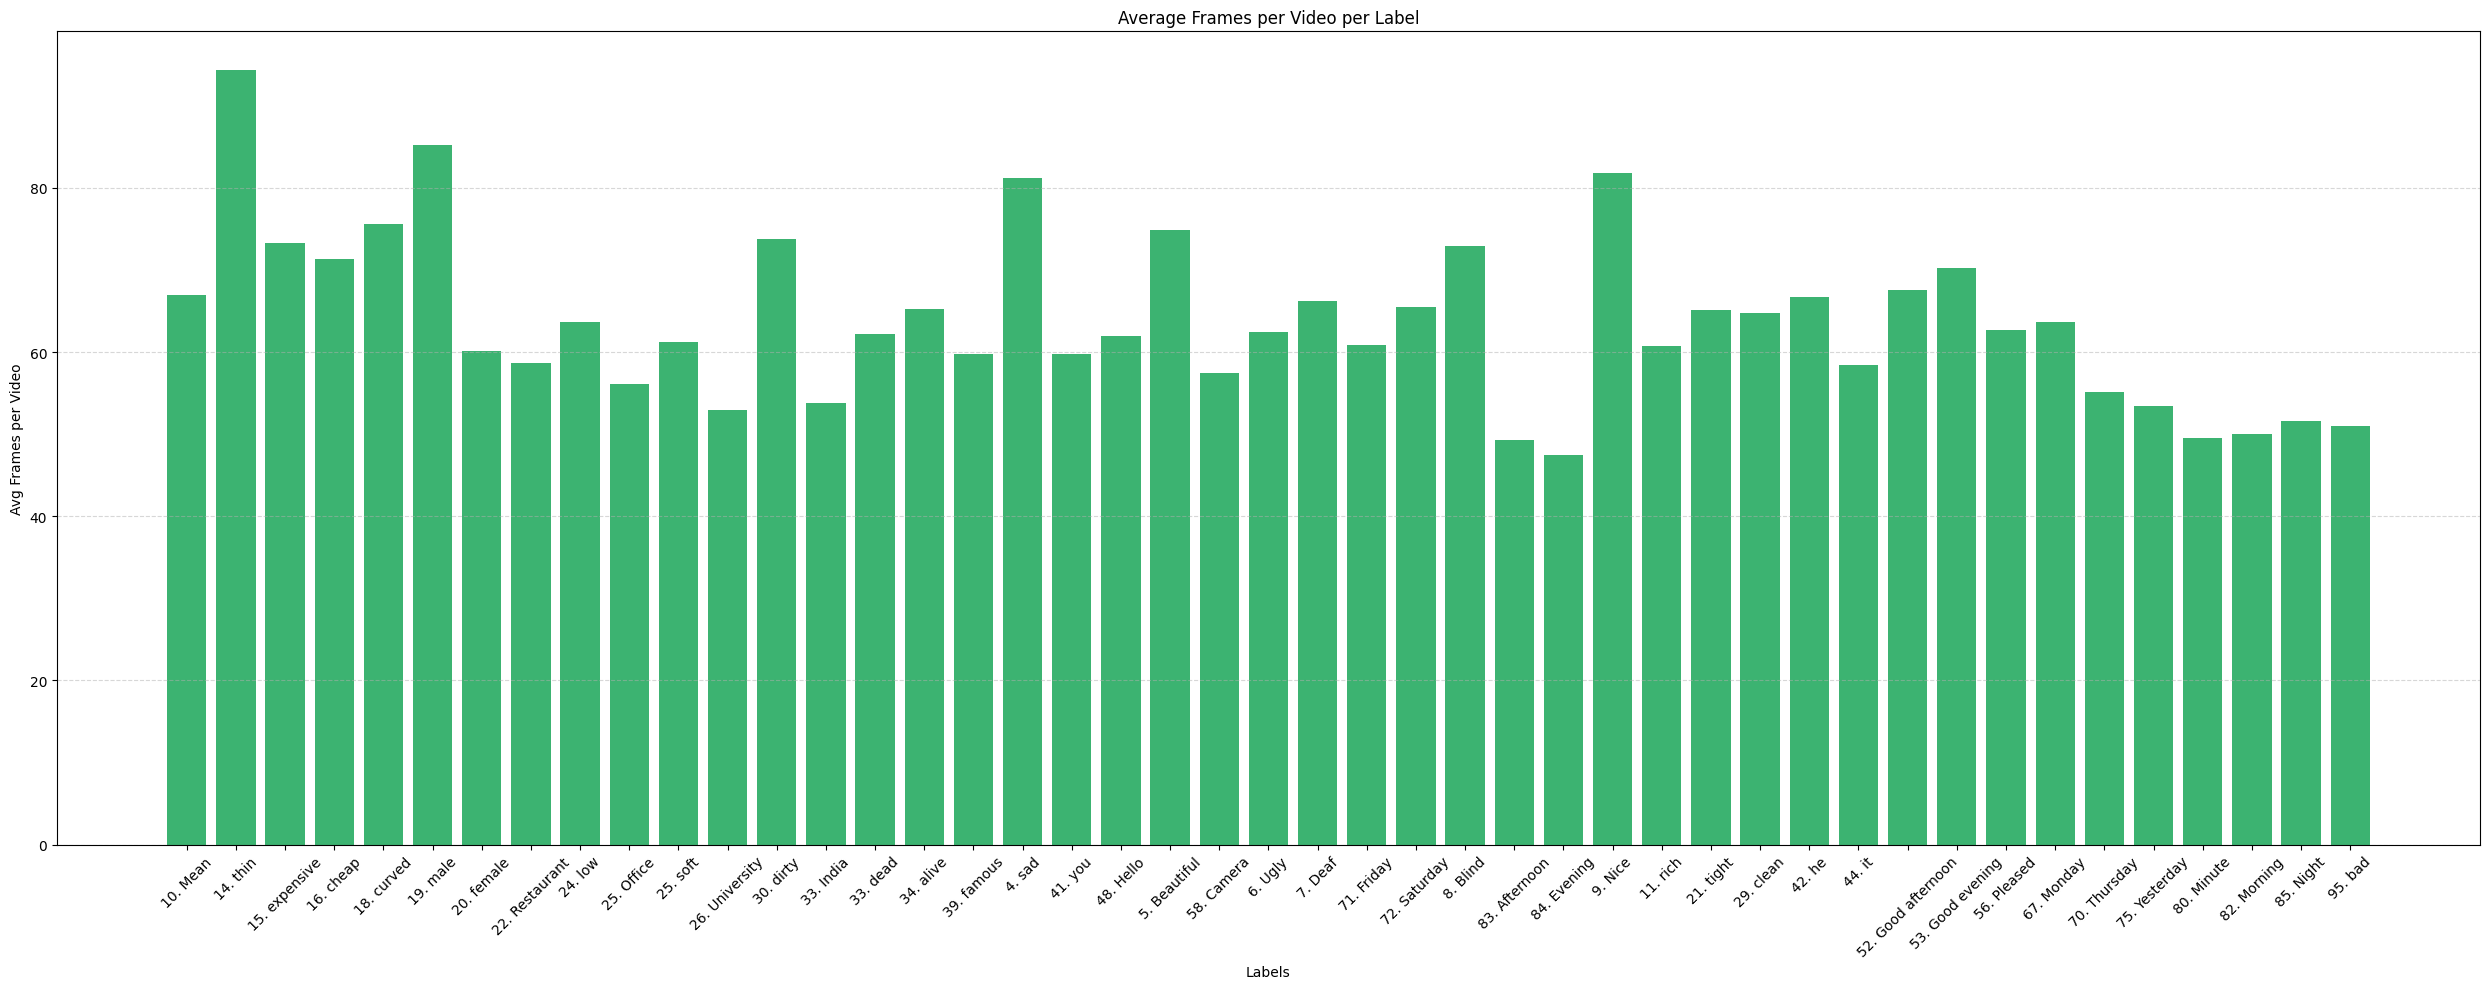

🔢 Average Frame Count per Video per Label:
Label: 10. Mean, Average Frames: 67.00
Label: 14. thin, Average Frames: 94.35
Label: 15. expensive, Average Frames: 73.25
Label: 16. cheap, Average Frames: 71.35
Label: 18. curved, Average Frames: 75.55
Label: 19. male, Average Frames: 85.25
Label: 20. female, Average Frames: 60.10
Label: 22. Restaurant, Average Frames: 58.70
Label: 24. low, Average Frames: 63.70
Label: 25. Office, Average Frames: 56.10
Label: 25. soft, Average Frames: 61.20
Label: 26. University, Average Frames: 52.95
Label: 30. dirty, Average Frames: 73.80
Label: 33. India, Average Frames: 53.85
Label: 33. dead, Average Frames: 62.25
Label: 34. alive, Average Frames: 65.20
Label: 39. famous, Average Frames: 59.80
Label: 4. sad, Average Frames: 81.25
Label: 41. you, Average Frames: 59.71
Label: 48. Hello, Average Frames: 61.90
Label: 5. Beautiful, Average Frames: 74.85
Label: 58. Camera, Average Frames: 57.45
Label: 6. Ugly, Average Frames: 62.50
Label: 7. Deaf, Average Frame

In [5]:
import pickle
from collections import defaultdict
import matplotlib.pyplot as plt

# Calculate total frames and video count per label
label_video_counts = defaultdict(int)
label_frame_counts = defaultdict(int)

for landmarks, label in zip(X, y):
    label_video_counts[label] += 1
    label_frame_counts[label] += len(landmarks)

# Calculate average frames per video
avg_frames_per_video = {
    label: label_frame_counts[label] / label_video_counts[label]
    for label in label_video_counts
}

# Sort for consistent plotting
labels = list(avg_frames_per_video.keys())
averages = [avg_frames_per_video[label] for label in labels]

# Plot
plt.figure(figsize=(25, 10))
plt.bar(labels, averages, color='mediumseagreen')
plt.title("Average Frames per Video per Label")
plt.xlabel("Labels")
plt.ylabel("Avg Frames per Video")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print
print("🔢 Average Frame Count per Video per Label:")
for label in labels:
    print(f"Label: {label}, Average Frames: {avg_frames_per_video[label]:.2f}")

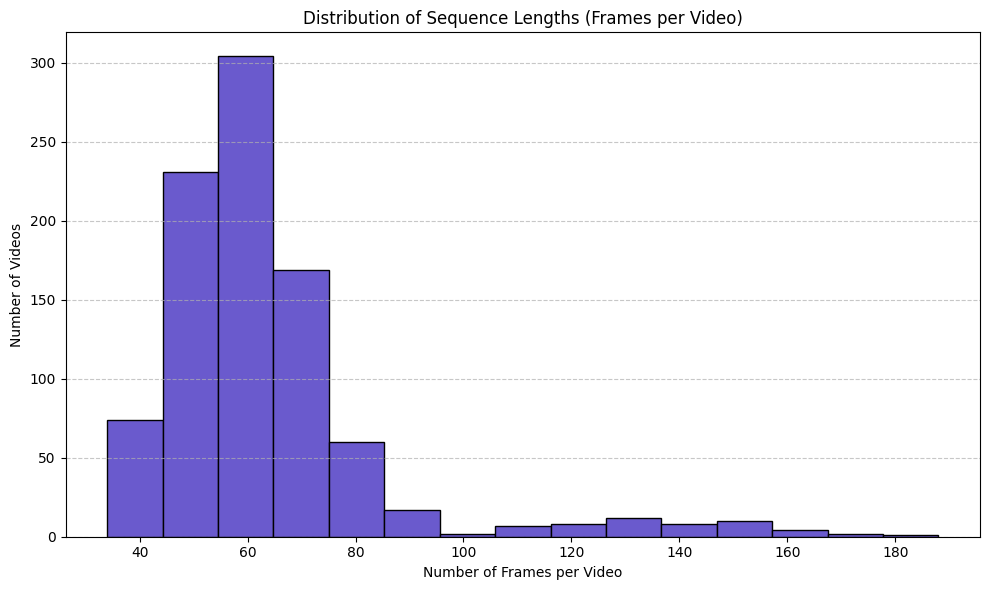

In [6]:
# Assuming `X` is already loaded and contains list of np arrays (sequence of frames per video)
sequence_lengths = [seq.shape[0] for seq in X]

plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=15, color='slateblue', edgecolor='black')
plt.title('Distribution of Sequence Lengths (Frames per Video)')
plt.xlabel('Number of Frames per Video')
plt.ylabel('Number of Videos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
import numpy as np

# Get the length (frames) of each sequence
sequence_lengths = [len(seq) for seq in X]

# Compute statistics
min_len = np.min(sequence_lengths)
max_len = np.max(sequence_lengths)
mean_len = np.mean(sequence_lengths)
median_len = np.median(sequence_lengths)

# Print results
print("📊 Sequence Length Statistics:")
print(f"🔹 Min Length:     {min_len}")
print(f"🔹 Max Length:     {max_len}")
print(f"🔹 Mean Length:    {mean_len:.2f}")
print(f"🔹 Median Length:  {median_len}")

# Inspect sequences with more than 120 frames
for idx, seq in enumerate(X):
    if len(seq) > 120:
        print(f"🔍 Video Index: {idx}, Label: {y[idx]}, Frames: {len(seq)}")


📊 Sequence Length Statistics:
🔹 Min Length:     34
🔹 Max Length:     188
🔹 Mean Length:    63.69
🔹 Median Length:  59.0
🔍 Video Index: 15, Label: 10. Mean, Frames: 161
🔍 Video Index: 18, Label: 10. Mean, Frames: 133
🔍 Video Index: 20, Label: 14. thin, Frames: 152
🔍 Video Index: 24, Label: 14. thin, Frames: 166
🔍 Video Index: 34, Label: 14. thin, Frames: 152
🔍 Video Index: 36, Label: 14. thin, Frames: 145
🔍 Video Index: 37, Label: 14. thin, Frames: 166
🔍 Video Index: 38, Label: 14. thin, Frames: 152
🔍 Video Index: 40, Label: 15. expensive, Frames: 128
🔍 Video Index: 45, Label: 15. expensive, Frames: 147
🔍 Video Index: 65, Label: 16. cheap, Frames: 140
🔍 Video Index: 68, Label: 16. cheap, Frames: 154
🔍 Video Index: 101, Label: 19. male, Frames: 140
🔍 Video Index: 107, Label: 19. male, Frames: 171
🔍 Video Index: 111, Label: 19. male, Frames: 137
🔍 Video Index: 113, Label: 19. male, Frames: 188
🔍 Video Index: 164, Label: 24. low, Frames: 137
🔍 Video Index: 243, Label: 30. dirty, Frames: 15

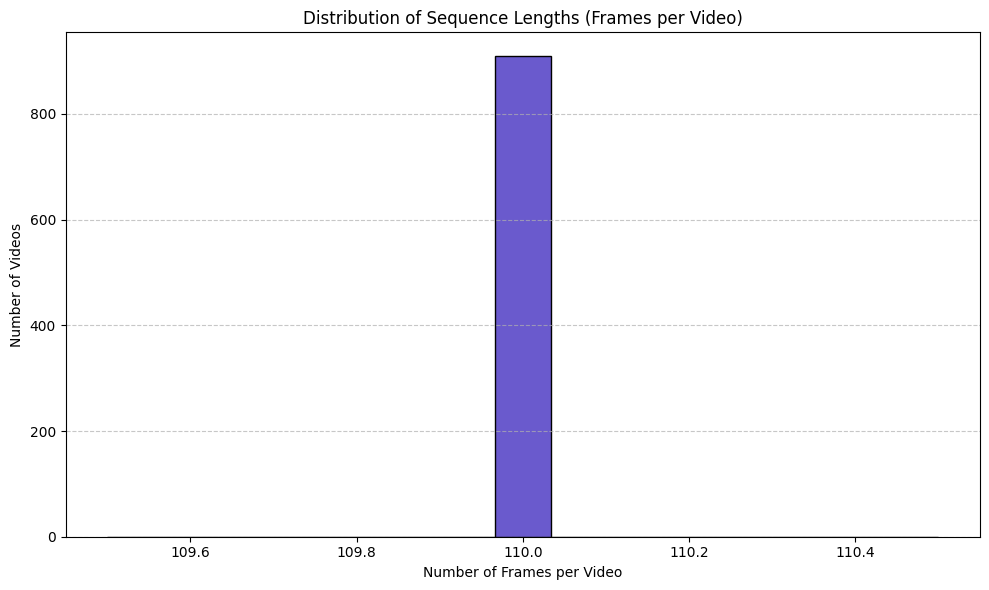

In [8]:
import random

def pad_or_trim_sequence(sequence, min_len=110, max_len=110):
    seq_len = len(sequence)

    # If longer than max_len, trim using frame skipping
    if seq_len > max_len:
        indices = np.linspace(0, seq_len - 1, num=max_len, dtype=int)
        return sequence[indices]

    while len(sequence) < min_len:
        insert_idx = random.randint(0, len(sequence) - 2)  # pick adjacent pair
        frame1 = sequence[insert_idx]
        frame2 = sequence[insert_idx + 1]
        interpolated = (frame1 + frame2) / 2.0

        # Insert the interpolated frame after frame1
        sequence = np.insert(sequence, insert_idx + 1, interpolated, axis=0)

    return sequence

final_X = [pad_or_trim_sequence(seq, min_len=110, max_len=110) for seq in X]

sequence_lengths = [seq.shape[0] for seq in final_X]

plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=15, color='slateblue', edgecolor='black')
plt.title('Distribution of Sequence Lengths (Frames per Video)')
plt.xlabel('Number of Frames per Video')
plt.ylabel('Number of Videos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
X = final_X

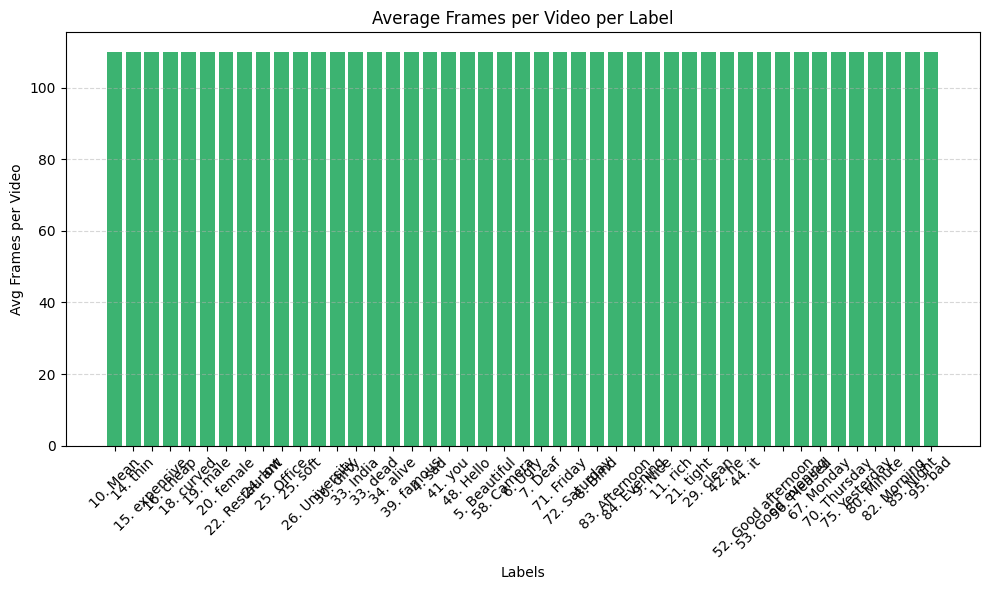

🔢 Average Frame Count per Video per Label:
Label: 10. Mean, Average Frames: 110.00
Label: 14. thin, Average Frames: 110.00
Label: 15. expensive, Average Frames: 110.00
Label: 16. cheap, Average Frames: 110.00
Label: 18. curved, Average Frames: 110.00
Label: 19. male, Average Frames: 110.00
Label: 20. female, Average Frames: 110.00
Label: 22. Restaurant, Average Frames: 110.00
Label: 24. low, Average Frames: 110.00
Label: 25. Office, Average Frames: 110.00
Label: 25. soft, Average Frames: 110.00
Label: 26. University, Average Frames: 110.00
Label: 30. dirty, Average Frames: 110.00
Label: 33. India, Average Frames: 110.00
Label: 33. dead, Average Frames: 110.00
Label: 34. alive, Average Frames: 110.00
Label: 39. famous, Average Frames: 110.00
Label: 4. sad, Average Frames: 110.00
Label: 41. you, Average Frames: 110.00
Label: 48. Hello, Average Frames: 110.00
Label: 5. Beautiful, Average Frames: 110.00
Label: 58. Camera, Average Frames: 110.00
Label: 6. Ugly, Average Frames: 110.00
Label:

In [9]:
# Calculate total frames and video count per label
label_video_counts = defaultdict(int)
label_frame_counts = defaultdict(int)

for landmarks, label in zip(X, y):
    label_video_counts[label] += 1
    label_frame_counts[label] += len(landmarks)

# Calculate average frames per video
avg_frames_per_video = {
    label: label_frame_counts[label] / label_video_counts[label]
    for label in label_video_counts
}

# Sort for consistent plotting
labels = list(avg_frames_per_video.keys())
averages = [avg_frames_per_video[label] for label in labels]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(labels, averages, color='mediumseagreen')
plt.title("Average Frames per Video per Label")
plt.xlabel("Labels")
plt.ylabel("Avg Frames per Video")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print
print("🔢 Average Frame Count per Video per Label:")
for label in labels:
    print(f"Label: {label}, Average Frames: {avg_frames_per_video[label]:.2f}")

In [10]:
import numpy as np

# Get the length (frames) of each sequence
sequence_lengths = [len(seq) for seq in X]

# Compute statistics
min_len = np.min(sequence_lengths)
max_len = np.max(sequence_lengths)
mean_len = np.mean(sequence_lengths)
median_len = np.median(sequence_lengths)

# Print results
print("📊 Sequence Length Statistics:")
print(f"🔹 Min Length:     {min_len}")
print(f"🔹 Max Length:     {max_len}")
print(f"🔹 Mean Length:    {mean_len:.2f}")
print(f"🔹 Median Length:  {median_len}")


📊 Sequence Length Statistics:
🔹 Min Length:     110
🔹 Max Length:     110
🔹 Mean Length:    110.00
🔹 Median Length:  110.0


In [11]:
import numpy as np

# Assuming X is your list of video sequences
num_sequences = len(X)
sequence_shape = X[0].shape  # e.g., (100, 1629)

print(f"📦 Total Sequences (Videos): {num_sequences}")
print(f"📐 Each Sequence Shape: {sequence_shape} (Frames x Features)")
print(f"🧊 Data Type: {type(X)}")

lengths = [len(seq) for seq in X]
unique_lengths = sorted(set(lengths))

print("📏 Unique sequence lengths:", unique_lengths)

📦 Total Sequences (Videos): 909
📐 Each Sequence Shape: (110, 1629) (Frames x Features)
🧊 Data Type: <class 'list'>
📏 Unique sequence lengths: [110]


In [12]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

# Encode string labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Get number of unique classes
num_classes = len(np.unique(y_encoded))

# Train-test split on filtered data
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Convert to one-hot encoding using dynamic num_classes
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)

# Print label distributions
unique, counts = np.unique(y_train, return_counts=True)
print("Train label distribution:", dict(zip(unique, counts)))

unique, counts = np.unique(y_val, return_counts=True)
print("Validation label distribution:", dict(zip(unique, counts)))

2025-06-28 07:03:27.374725: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751094207.397892   17311 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751094207.405900   17311 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Train label distribution: {0: 16, 1: 16, 2: 16, 3: 16, 4: 16, 5: 16, 6: 16, 7: 16, 8: 16, 9: 16, 10: 16, 11: 16, 12: 16, 13: 16, 14: 16, 15: 16, 16: 16, 17: 16, 18: 16, 19: 16, 20: 16, 21: 17, 22: 17, 23: 17, 24: 17, 25: 16, 26: 17, 27: 17, 28: 17, 29: 16, 30: 16, 31: 16, 32: 16, 33: 16, 34: 16, 35: 16, 36: 16, 37: 16, 38: 16, 39: 16, 40: 16, 41: 16, 42: 16, 43: 16, 44: 16}
Validation label distribution: {0: 4, 1: 4, 2: 4, 3: 4, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 19: 4, 20: 4, 21: 4, 22: 4, 23: 4, 24: 4, 25: 4, 26: 5, 27: 4, 28: 4, 29: 4, 30: 4, 31: 4, 32: 4, 33: 4, 34: 4, 35: 4, 36: 4, 37: 4, 38: 4, 39: 4, 40: 4, 41: 4, 42: 4, 43: 4, 44: 5}


In [13]:
import pandas as pd

# Create a mapping DataFrame: Integer → Original Label
label_mapping_df = pd.DataFrame({
    'Label Index': np.arange(len(le.classes_)),   # safer than range() with numpy
    'Label Name': le.classes_
})

# Sort just to be sure (optional but good practice)
label_mapping_df = label_mapping_df.sort_values('Label Index').reset_index(drop=True)

# Show it
print(label_mapping_df)

# Save as CSV for inference use
label_mapping_df.to_csv('/kaggle/working/Normal_label_mapping.csv', index=False)


    Label Index          Label Name
0             0            10. Mean
1             1            11. rich
2             2            14. thin
3             3       15. expensive
4             4           16. cheap
5             5          18. curved
6             6            19. male
7             7          20. female
8             8           21. tight
9             9      22. Restaurant
10           10             24. low
11           11          25. Office
12           12            25. soft
13           13      26. University
14           14           29. clean
15           15           30. dirty
16           16           33. India
17           17            33. dead
18           18           34. alive
19           19          39. famous
20           20              4. sad
21           21             41. you
22           22              42. he
23           23              44. it
24           24           48. Hello
25           25        5. Beautiful
26           26  52. Good af

In [14]:
import numpy as np

# Normalization function
def no_normalize_landmarks_relative_to_chest(X):
    X = np.asarray(X, dtype=np.float32)
    if len(X.shape) != 3 or X.shape[2] != 1629:
        raise ValueError(f"Expected shape (samples, frames, 1629), got {X.shape}")
    X_norm = np.copy(X)
    '''
    for sample_idx in range(X.shape[0]):
        for frame_idx in range(X.shape[1]):
            frame = X[sample_idx, frame_idx]
            lx, ly, lz = frame[11 * 3], frame[11 * 3 + 1], frame[11 * 3 + 2]
            rx, ry, rz = frame[12 * 3], frame[12 * 3 + 1], frame[12 * 3 + 2]
            chest_x = (lx + rx) / 2
            chest_y = (ly + ry) / 2
            chest_z = (lz + rz) / 2
            for landmark_idx in range(543):
                base = landmark_idx * 3
                X_norm[sample_idx, frame_idx, base] -= chest_x
                X_norm[sample_idx, frame_idx, base + 1] -= chest_y
                X_norm[sample_idx, frame_idx, base + 2] -= chest_z
    '''
    return X_norm

In [15]:
import numpy as np
from scipy.spatial import procrustes

def normalize_landmarks_relative_to_chest(X, epsilon=1e-8):
    """
    Apply Procrustes alignment and normalize landmarks relative to chest + bbox size.

    Args:
        X: np.ndarray of shape (samples, frames, 1629)
        epsilon: small value to prevent division by zero

    Returns:
        X_norm: normalized landmarks
    """
    X = np.asarray(X, dtype=np.float32)
    if len(X.shape) != 3 or X.shape[2] != 1629:
        raise ValueError(f"Expected shape (samples, frames, 1629), got {X.shape}")

    X_norm = np.copy(X)

    for sample_idx in range(X.shape[0]):
        # Use first frame as reference for Procrustes alignment
        ref_frame = X[sample_idx, 0].reshape(543, 3)

        for frame_idx in range(X.shape[1]):
            frame = X[sample_idx, frame_idx].reshape(543, 3)

            # Procrustes alignment: align current frame to ref_frame
            _, aligned_frame, _ = procrustes(ref_frame, frame)

            # Flatten aligned frame
            aligned_flat = aligned_frame.flatten()

            # Compute bounding box
            xs = aligned_flat[::3]
            ys = aligned_flat[1::3]
            zs = aligned_flat[2::3]

            min_x, max_x = np.min(xs), np.max(xs)
            min_y, max_y = np.min(ys), np.max(ys)
            min_z, max_z = np.min(zs), np.max(zs)

            width = max_x - min_x + epsilon
            height = max_y - min_y + epsilon
            depth = max_z - min_z + epsilon

            # Compute chest center (from aligned points)
            lx, ly, lz = aligned_flat[11 * 3], aligned_flat[11 * 3 + 1], aligned_flat[11 * 3 + 2]
            rx, ry, rz = aligned_flat[12 * 3], aligned_flat[12 * 3 + 1], aligned_flat[12 * 3 + 2]
            chest_x = (lx + rx) / 2
            chest_y = (ly + ry) / 2
            chest_z = (lz + rz) / 2

            # Normalize landmarks
            for landmark_idx in range(543):
                base = landmark_idx * 3
                X_norm[sample_idx, frame_idx, base]     = (aligned_flat[base]     - chest_x) / width
                X_norm[sample_idx, frame_idx, base + 1] = (aligned_flat[base + 1] - chest_y) / height
                X_norm[sample_idx, frame_idx, base + 2] = (aligned_flat[base + 2] - chest_z) / depth

    return X_norm


In [16]:
X_train_centered = normalize_landmarks_relative_to_chest(X_train)
X_val_centered = normalize_landmarks_relative_to_chest(X_val)
X_train = X_train_centered
X_val = X_val_centered
print("X_train shape:", X_train.shape)  # Should be (225, 110, 1629)
print("X_val shape:", X_val.shape)      # Should be (57, 110, 1629)
print("y_train shape:", y_train_cat.shape)  # Should be (225, 14)
print("y_val shape:", y_val_cat.shape)      # Should be (57, 14)

X_train shape: (727, 110, 1629)
X_val shape: (182, 110, 1629)
y_train shape: (727, 45)
y_val shape: (182, 45)


# GRU Model

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout, LayerNormalization, Attention, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Input, Lambda
import numpy as np
import random
import pandas as pd

tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Define scenarios
learning_rates = [0.00005, 0.0001]
dropout_configs = [(0, 0.1, 0.1), (0, 0.1, 0.15)]
patience_values = [10,12]
results = []
best_val_acc = 0
best_model_weights = None
best_model_config = None
best_model_history = None
model_file = []

def attention_block(x):
    # x: (batch, timesteps, features)
    attention_scores = Dense(1, activation='tanh')(x)  # (batch, timesteps, 1)

    attention_weights = Lambda(lambda s: tf.nn.softmax(s, axis=1))(attention_scores)  # (batch, timesteps, 1)
    weighted_sum = Lambda(lambda s: tf.reduce_sum(s[0] * s[1], axis=1))([x, attention_weights])  # (batch, features)

    return weighted_sum

inputs = Input(shape=(110, 1629))
best_val_acc = 0
best_model_weights = None

# Loop over scenarios
for lr in learning_rates:
    for dropout in dropout_configs:
        for patience in patience_values:
            print(f"\n=== Scenario: LR={lr}, Dropout={dropout}, Patience={patience} ===")
            x = GRU(384, return_sequences=True)(inputs)
            x = LayerNormalization()(x)
            x = Dropout(dropout[0])(x)

            x = GRU(256, return_sequences=True)(x)
            x = LayerNormalization()(x)
            x = Dropout(dropout[1])(x)

            x = GRU(128, return_sequences=True)(x)
            x = LayerNormalization()(x)

            x = attention_block(x)
            x = Dense(64, activation='relu')(x)
            x = Dropout(dropout[2])(x)
            outputs = Dense(num_classes, activation='softmax')(x)

            model = Model(inputs, outputs)

            model.compile(
                optimizer=Adam(learning_rate=lr),
                loss='categorical_crossentropy',
                metrics=['accuracy']
            )

            early_stop = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
            reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=0, min_lr=1e-5)

            history = model.fit(
                X_train, y_train_cat,
                validation_data=(X_val, y_val_cat),
                batch_size=16,
                epochs=80,
                callbacks=[early_stop, reduce_lr],
                verbose=0
            )

            train_loss, train_acc = model.evaluate(X_train, y_train_cat, verbose=0)
            val_loss, val_acc = model.evaluate(X_val, y_val_cat, verbose=0)
            y_val_pred = np.argmax(model.predict(X_val, verbose=0), axis=1)
            y_val_true = np.argmax(y_val_cat, axis=1)
            conf_matrix = confusion_matrix(y_val_true, y_val_pred)

            results.append({
                'LR': lr,
                'Dropout': dropout,
                'Patience': patience,
                'Train Loss': train_loss,
                'Train Acc': train_acc * 100,
                'Val Loss': val_loss,
                'Val Acc': val_acc * 100,
            })

            # Save best model weights
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_model_weights = model.get_weights()
                best_model_config = {'lr': lr, 'dropout': dropout, 'patience': patience}
                best_model_history = history.history


            print("\n=== Evaluation for current config ===")
            print(f"Learning Rate: {lr}, Dropout: {dropout}, Patience: {patience}")
            print(f"Train Loss: {train_loss:.4f}, Acc: {train_acc*100:.2f}%")
            print(f"Val Loss: {val_loss:.4f}, Acc: {val_acc*100:.2f}%")
            print("Confusion Matrix:\n", conf_matrix)

            model_path = f'Attention_Bi-Dir_LR{lr}_Drop{dropout[0]}-{dropout[1]}-{dropout[2]}_Pat{patience}_Train{train_acc*100:.2f}_Val{val_acc*100:.2f}.h5'
            model_file.append(model_path)
            model.save(model_path)

            print(f"Saved model: {model_path}")

            results_df = pd.DataFrame(results)
            print("\n=== Running Summary of Results ===")
            print(results_df[['LR', 'Dropout', 'Patience', 'Train Acc', 'Val Acc']].round(2))

            best_so_far = results_df.loc[results_df['Val Acc'].idxmax()]
            print(f"\nBest So Far → Val Acc: {best_so_far['Val Acc']:.2f}% | LR={best_so_far['LR']}, Dropout={best_so_far['Dropout']}, Patience={best_so_far['Patience']}")

# === FINAL BEST MODEL ===
if best_model_weights is not None:
    final_best_model = Model(inputs, outputs)
    final_best_model.set_weights(best_model_weights)
    print(f"\n✅ Best model loaded with Val Acc = {best_val_acc*100:.2f}%")
    print(f"Best Config: {best_model_config}")
    print(f"Final Training Accuracy: {best_model_history['accuracy'][-1]:.4f}")
    print(f"Final Validation Accuracy: {best_model_history['val_accuracy'][-1]:.4f}")
else:
    print("⚠️ No valid best model found.")



=== Scenario: LR=5e-05, Dropout=(0, 0.1, 0.1), Patience=10 ===


I0000 00:00:1751094384.555792   17311 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10558 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751094384.556623   17311 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13742 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
I0000 00:00:1751094393.584334   20103 cuda_dnn.cc:529] Loaded cuDNN version 90300



=== Evaluation for current config ===
Learning Rate: 5e-05, Dropout: (0, 0.1, 0.1), Patience: 10
Train Loss: 0.3116, Acc: 96.15%
Val Loss: 0.8132, Acc: 85.16%
Confusion Matrix:
 [[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 4 0]
 [1 0 0 ... 1 0 2]]
Saved model: Attention_Bi-Dir_LR5e-05_Drop0-0.1-0.1_Pat10_Train96.15_Val85.16.h5

=== Running Summary of Results ===
    LR        Dropout  Patience  Train Acc  Val Acc
0  0.0  (0, 0.1, 0.1)        10      96.15    85.16

Best So Far → Val Acc: 85.16% | LR=5e-05, Dropout=(0, 0.1, 0.1), Patience=10

=== Scenario: LR=5e-05, Dropout=(0, 0.1, 0.1), Patience=12 ===

=== Evaluation for current config ===
Learning Rate: 5e-05, Dropout: (0, 0.1, 0.1), Patience: 12
Train Loss: 0.3540, Acc: 96.15%
Val Loss: 0.8052, Acc: 80.22%
Confusion Matrix:
 [[2 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 1 0 2]]
Saved model: Attention_Bi-Dir_LR5e-05_D

In [18]:
# Print final accuracy
training_accuracy = best_model_history['accuracy']
validation_accuracy = best_model_history['val_accuracy']
print(f"Final Training Accuracy: {training_accuracy[-1]:.4f}")
print(f"Final Validation Accuracy: {validation_accuracy[-1]:.4f}")

# Extract training and validation loss from the history (optional)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Print the final training and validation accuracy in the desired format
print(f"Final Training Accuracy: {training_accuracy[-1]:.4f}")
print(f"Final Validation Accuracy: {validation_accuracy[-1]:.4f}")

Final Training Accuracy: 0.9340
Final Validation Accuracy: 0.8516
Final Training Accuracy: 0.9340
Final Validation Accuracy: 0.8516


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


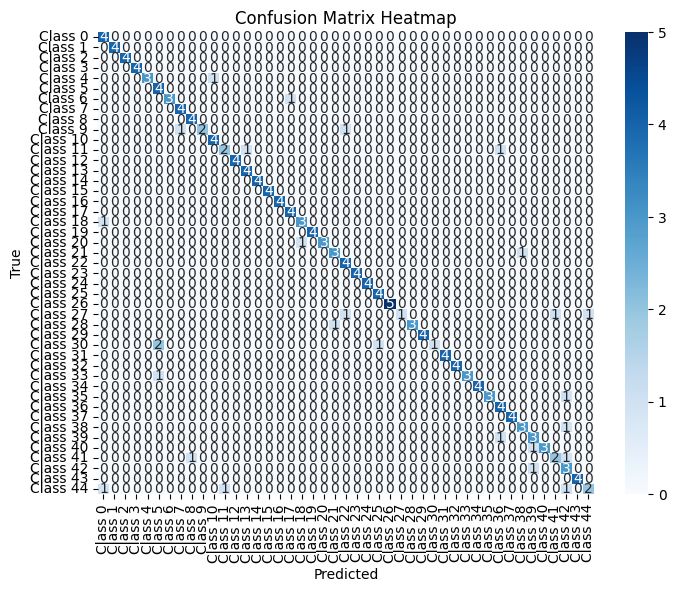

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      0.75      0.86         4
           5       0.57      1.00      0.73         4
           6       1.00      0.75      0.86         4
           7       0.80      1.00      0.89         4
           8       0.80      1.00      0.89         4
           9       1.00      0.50      0.67         4
          10       0.80      1.00      0.89         4
          11       0.67      0.50      0.57         4
          12       1.00      1.00      1.00         4
          13       0.80      1.00      0.89         4
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         4
   

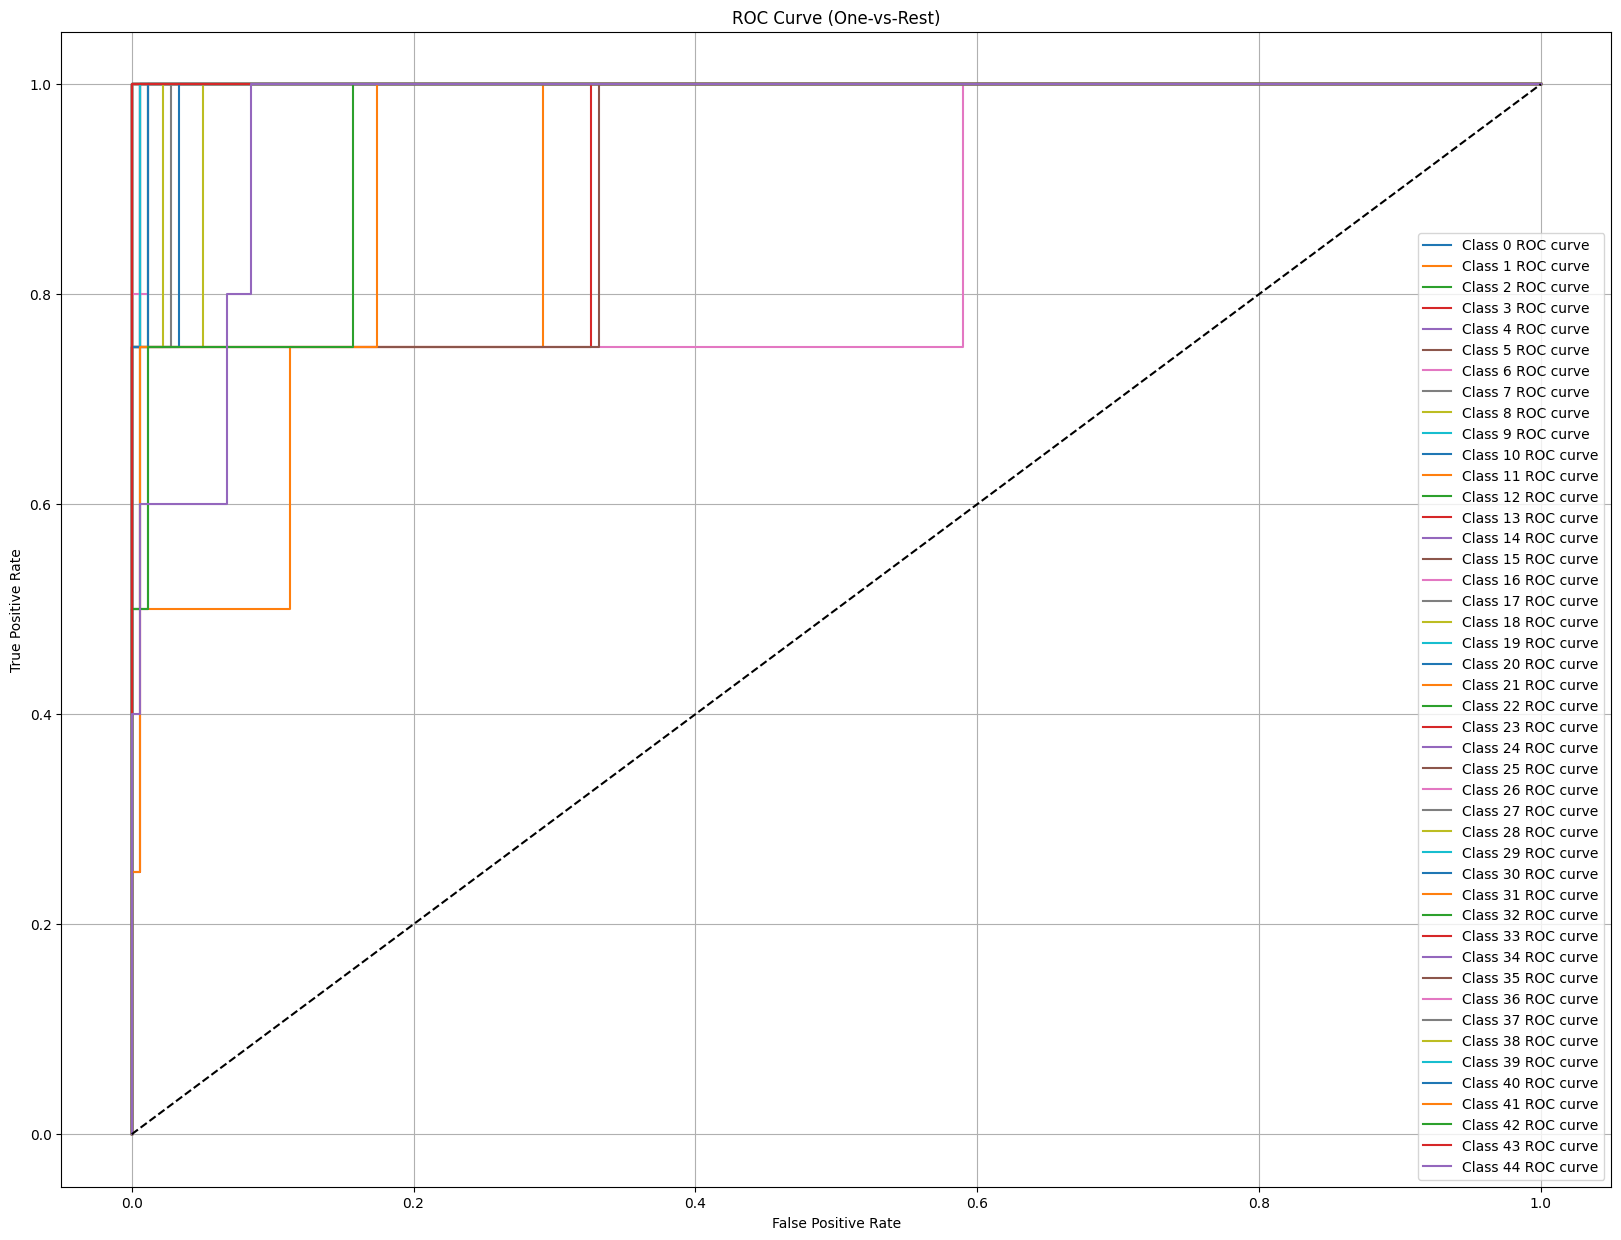

In [19]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import label_binarize
model = final_best_model
# Get model predictions
y_pred_probs = model.predict(X_val)  # shape: (24, 6)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val_cat, axis=1)


# --- Confusion Matrix Heatmap ---
cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Class {i}' for i in range(cm.shape[1])],
            yticklabels=[f'Class {i}' for i in range(cm.shape[0])])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# --- Accuracy, Precision, Recall, F1 ---
print("Classification Report:\n", classification_report(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))

# --- ROC-AUC (Macro, Micro, Per-class) ---
# Binarize true labels for ROC-AUC
n_classes = y_pred_probs.shape[1]
y_true_bin = label_binarize(y_true, classes=range(n_classes))

# Compute ROC AUC score
roc_auc_macro = roc_auc_score(y_true_bin, y_pred_probs, average='macro')
roc_auc_micro = roc_auc_score(y_true_bin, y_pred_probs, average='micro')
print("ROC AUC (macro):", roc_auc_macro)
print("ROC AUC (micro):", roc_auc_micro)

# --- Plot ROC Curve (for each class) ---
fpr = dict()
tpr = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])

plt.figure(figsize=(20, 15))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend()
plt.grid(True)

plt.savefig("GRU_45_DTW_Labels_roc_curve_highres.png", dpi=1800, bbox_inches='tight')  # 📦 <- this saves the file

plt.show()


# Heat Map

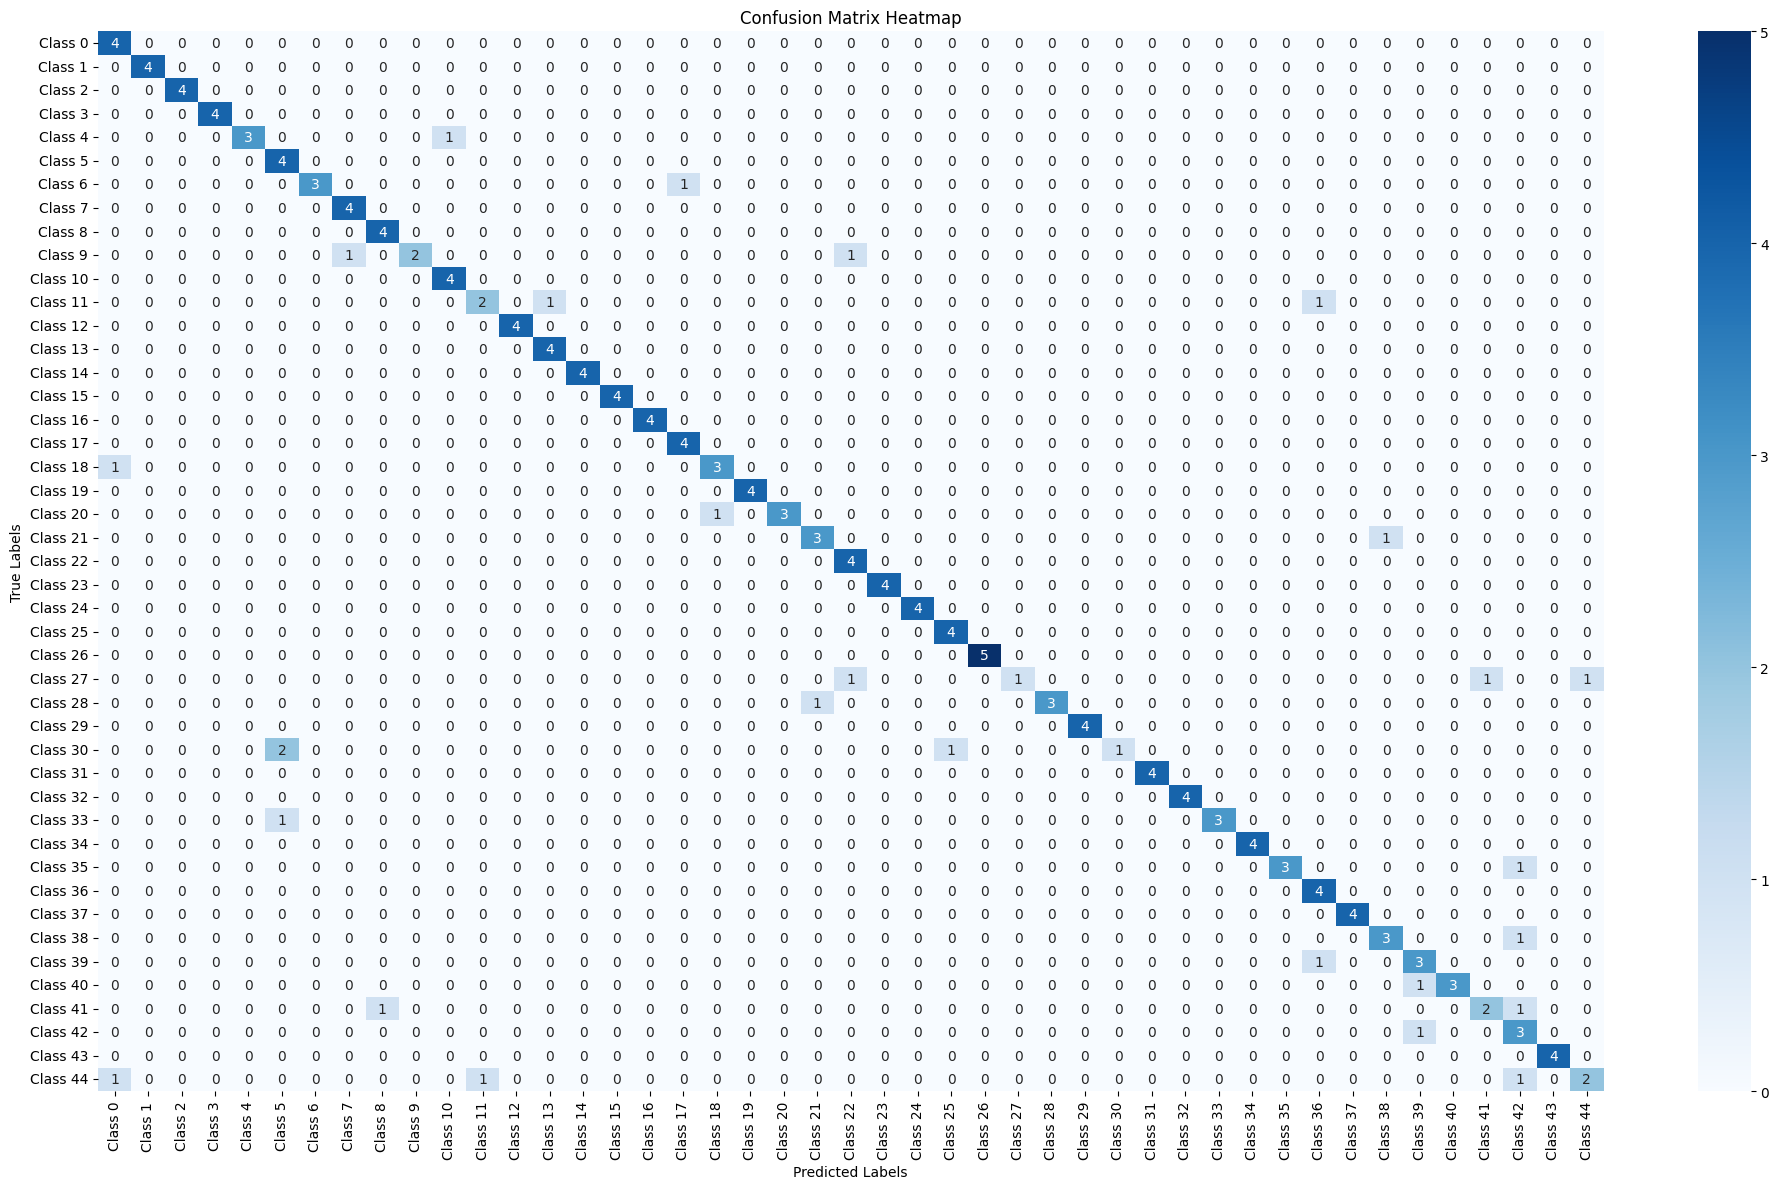

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Optional: Class labels
class_names = [f"Class {i}" for i in range(cm.shape[0])]

# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()

# Save the figure
plt.savefig("GRU_45_DTW_Labels_confusion_matrix.png", dpi=1800)

# Show the plot
plt.show()


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

y_prob = model.predict(X_val)           # shape: (samples, classes)
y_pred = np.argmax(y_prob, axis=1)      # predicted labels


# Precision, Recall, F1-Score (macro-averaged)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

from sklearn.preprocessing import label_binarize

y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
auc = roc_auc_score(y_true_bin, y_prob, average='macro', multi_class='ovr')

print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-ROC: {auc:.4f}")



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
F1-score: 0.8452
Precision: 0.8811
Recall: 0.8533
AUC-ROC: 0.9868


In [22]:
model.save_weights("Best_attention_gru.weights.h5")

# Fine Tunning the Model

In [23]:
!pip install mediapipe

In [24]:
import os
import cv2
import numpy as np
import mediapipe as mp

mp_holistic = mp.solutions.holistic

# (x ,110, 1629)
def extract_holistic_landmarks(frame, holistic):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = holistic.process(rgb_frame)

    # Fixed-size vector: 42 hand + 468 face + 33 pose = 543 points × 3 coordinates = 1629 features   [ x1 y1 z1 x2 y2 z2 ]
    landmark_vector = np.zeros(1629, dtype=np.float32)

    # Hands (42 points: 21 left + 21 right)
    if results.left_hand_landmarks:
        left_hand = np.array([(lm.x, lm.y, lm.z) for lm in results.left_hand_landmarks.landmark]).flatten()
        landmark_vector[:63] = left_hand  # 21 × 3 = 63
    if results.right_hand_landmarks:
        right_hand = np.array([(lm.x, lm.y, lm.z) for lm in results.right_hand_landmarks.landmark]).flatten()
        landmark_vector[63:126] = right_hand  # Next 63

    # Face (468 points)
    if results.face_landmarks:
        face = np.array([(lm.x, lm.y, lm.z) for lm in results.face_landmarks.landmark]).flatten()
        landmark_vector[126:126 + 468*3] = face  # 468 × 3 = 1404

    # Pose (33 points)
    if results.pose_landmarks:
        pose = np.array([(lm.x, lm.y, lm.z) for lm in results.pose_landmarks.landmark]).flatten()
        landmark_vector[126 + 468*3:] = pose  # 33 × 3 = 99

    return landmark_vector

def process_videos(root_folder, output_name=''):
    holistic = mp_holistic.Holistic(static_image_mode=False, min_detection_confidence=0.5)

    dataset = []  # List of sequences (one per video)
    labels = []   # One label per video

    sign_folders = sorted(os.listdir(root_folder))
    print(f"📁 Detected categories: {sign_folders}")

    for sign_folder in sign_folders:
        sign_path = os.path.join(root_folder, sign_folder)
        if not os.path.isdir(sign_path):
            continue

        print(f"\n🔄 Processing label: {sign_folder}")
        video_files = [f for f in os.listdir(sign_path) if f.lower().endswith(('.mov', '.mp4', '.avi', '.mkv', '.wmv', '.flv', '.webm'))]
        print(f"🎞️ Total videos: {len(video_files)}")

        for video_file in video_files:
            video_path = os.path.join(sign_path, video_file)
            print(f"🎬 {video_file}")

            cap = cv2.VideoCapture(video_path)
            video_landmarks = []  # Landmarks for this video

            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break
                landmark_vector = extract_holistic_landmarks(frame, holistic)
                video_landmarks.append(landmark_vector)

            cap.release()
            if video_landmarks:  # Only add if some frames were processed
                dataset.append(np.array(video_landmarks))  # Shape: (num_frames, 1629)
                labels.append(sign_folder)

    # Save as pickle since sequences have variable lengths
    import pickle
    with open(f"{output_name}_holistic_landmarks_videos.pkl", "wb") as f:
        pickle.dump(dataset, f)

    with open(f"{output_name}_holistic_labels_videos.pkl", "wb") as f:
        pickle.dump(labels, f)
    print("\n✅ Dataset saved successfully!")
    holistic.close()

# Example usage
# process_videos("path/to/root_folder")

In [33]:
import os
import shutil

# List of input directories
input_dirs = [
    "/kaggle/input/testing-data/Beautiful",
    "/kaggle/input/testing-data/Nice",
]


# Destination base folder
output_base = "/kaggle/working/Test_combined_videos"
os.makedirs(output_base, exist_ok=True)

# Copy all videos into their label-specific folders
for input_dir in input_dirs:
    label_name = os.path.basename(input_dir)
    print(f"📂 Processing: {label_name}")

    # Create destination folder for this label
    dest_folder = os.path.join(output_base, label_name)
    os.makedirs(dest_folder, exist_ok=True)

    # Copy all .MOV and .MP4 files
    for file in os.listdir(input_dir):
        if file.endswith((".MOV", ".MP4", ".mp4")):
            src_path = os.path.join(input_dir, file)
            dest_path = os.path.join(dest_folder, file)
            shutil.copy2(src_path, dest_path)
            print(f"✅ Copied: {file}")

print("\n✅ All videos organized by label.")


📂 Processing: Beautiful
✅ Copied: Beautiful_3.mp4
✅ Copied: Beautiful_9.mp4
✅ Copied: Beautiful_10.mp4
✅ Copied: Beautiful_8.mp4
✅ Copied: Beautiful_2.mp4
✅ Copied: Beautiful_11.mp4
✅ Copied: Beautiful_7.mp4
✅ Copied: Beautiful_1.mp4
✅ Copied: Beautiful_6.mp4
✅ Copied: Beautiful_4.mp4
✅ Copied: Beautiful_5.mp4
📂 Processing: Nice
✅ Copied: Nice_4.mp4
✅ Copied: Nice_8.mp4
✅ Copied: Nice_11.mp4
✅ Copied: Nice_3.mp4
✅ Copied: Nice_1.mp4
✅ Copied: Nice_6.mp4
✅ Copied: Nice_9.mp4
✅ Copied: Nice_2.mp4
✅ Copied: Nice_10.mp4
✅ Copied: Nice_7.mp4
✅ Copied: Nice_5.mp4

✅ All videos organized by label.


In [34]:
# List of input directories  NEED TO CREATE THE TESTING FODLER AGAIN
root_folder = "/kaggle/working/Test_combined_videos"
process_videos(root_folder, "Testing")



📁 Detected categories: ['Beautiful', 'Nice']

🔄 Processing label: Beautiful
🎞️ Total videos: 11
🎬 Beautiful_4.mp4


W0000 00:00:1751097974.997171   47942 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751097975.061039   47942 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751097975.063702   47944 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751097975.065330   47945 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751097975.065330   47943 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751097975.078095   47944 inference_feedback_manager.cc:114] Feedback manager 

🎬 Beautiful_2.mp4
🎬 Beautiful_11.mp4
🎬 Beautiful_3.mp4
🎬 Beautiful_6.mp4
🎬 Beautiful_7.mp4
🎬 Beautiful_10.mp4
🎬 Beautiful_1.mp4
🎬 Beautiful_8.mp4
🎬 Beautiful_9.mp4
🎬 Beautiful_5.mp4

🔄 Processing label: Nice
🎞️ Total videos: 11
🎬 Nice_6.mp4
🎬 Nice_7.mp4
🎬 Nice_11.mp4
🎬 Nice_9.mp4
🎬 Nice_2.mp4
🎬 Nice_8.mp4
🎬 Nice_1.mp4
🎬 Nice_3.mp4
🎬 Nice_10.mp4
🎬 Nice_5.mp4
🎬 Nice_4.mp4

✅ Dataset saved successfully!


In [41]:
import random

import pickle
import numpy as np

# Correct file paths
labels_file = '/kaggle/working/Testing_holistic_labels_videos.pkl'
landmarks_file = '/kaggle/working/Testing_holistic_landmarks_videos.pkl'

# Load original labels and landmarks
with open(labels_file, 'rb') as f:
    y = pickle.load(f)

with open(landmarks_file, 'rb') as f:
    X = pickle.load(f)


# Print shapes and lengths
print(f'Number of videos landmarks sequences: {len(X)}')
for i, landmark_seq in enumerate(X[:5]):  # Print first 5 for inspection
    print(f'Landmark sequence {i} shape: {landmark_seq.shape}')
print(f'Number of labels: {len(y)}')
print(f'Sample labels: {y[:5]}')  # Print first 5 labels

print(f"🔢 Length of X: {len(X)}, Length of y: {len(y)}")

def pad_or_trim_sequence(sequence, min_len=110, max_len=110):
    seq_len = len(sequence)

    # If longer than max_len, trim using frame skipping
    if seq_len > max_len:
        indices = np.linspace(0, seq_len - 1, num=max_len, dtype=int)
        return sequence[indices]

    while len(sequence) < min_len:
        insert_idx = random.randint(0, len(sequence) - 2)  # pick adjacent pair
        frame1 = sequence[insert_idx]
        frame2 = sequence[insert_idx + 1]
        interpolated = (frame1 + frame2) / 2.0

        # Insert the interpolated frame after frame1
        sequence = np.insert(sequence, insert_idx + 1, interpolated, axis=0)

    return sequence

final_X = [pad_or_trim_sequence(seq, min_len=110, max_len=110) for seq in X]

sequence_lengths = [seq.shape[0] for seq in final_X]

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

# Encode string labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Get number of unique classes
num_classes = len(np.unique(y_encoded))

# Replace X with final_X
X_train, X_val, y_train, y_val = train_test_split(
    final_X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Convert to one-hot encoding using dynamic num_classes
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)

# Print label distributions
unique, counts = np.unique(y_train, return_counts=True)
print("Train label distribution:", dict(zip(unique, counts)))

unique, counts = np.unique(y_val, return_counts=True)
print("Validation label distribution:", dict(zip(unique, counts)))

X_train_centered = normalize_landmarks_relative_to_chest(X_train)
X_val_centered = normalize_landmarks_relative_to_chest(X_val)
X_train = X_train_centered
X_val = X_val_centered
print("X_train shape:", X_train.shape)  # Should be (225, 110, 1629)
print("X_val shape:", X_val.shape)      # Should be (57, 110, 1629)
print("y_train shape:", y_train_cat.shape)  # Should be (225, 14)
print("y_val shape:", y_val_cat.shape)      # Should be (57, 14)

import pandas as pd
import numpy as np
import os

mapping_path = '/kaggle/working/Normal_label_mapping.csv'

if os.path.exists(mapping_path):
    # ✅ Mapping exists, load it
    label_mapping_df = pd.read_csv(mapping_path)
    print("✅ Loaded existing label mapping:")
else:
    # ✅ Mapping does not exist, generate and save
    label_mapping_df = pd.DataFrame({
        'Label Index': np.arange(len(le.classes_)),
        'Label Name': le.classes_
    }).sort_values('Label Index').reset_index(drop=True)

    label_mapping_df.to_csv(mapping_path, index=False)
    print("✅ Created and saved new label mapping:")

# Show mapping
print(label_mapping_df)


Number of videos landmarks sequences: 22
Landmark sequence 0 shape: (90, 1629)
Landmark sequence 1 shape: (90, 1629)
Landmark sequence 2 shape: (90, 1629)
Landmark sequence 3 shape: (90, 1629)
Landmark sequence 4 shape: (90, 1629)
Number of labels: 22
Sample labels: ['Beautiful', 'Beautiful', 'Beautiful', 'Beautiful', 'Beautiful']
🔢 Length of X: 22, Length of y: 22
Train label distribution: {0: 8, 1: 9}
Validation label distribution: {0: 3, 1: 2}
X_train shape: (17, 110, 1629)
X_val shape: (5, 110, 1629)
y_train shape: (17, 2)
y_val shape: (5, 2)
✅ Loaded existing label mapping:
    Label Index          Label Name
0             0            10. Mean
1             1            11. rich
2             2            14. thin
3             3       15. expensive
4             4           16. cheap
5             5          18. curved
6             6            19. male
7             7          20. female
8             8           21. tight
9             9      22. Restaurant
10           10   

# Fine Tunnning the model

Epoch 1/70


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 0 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:629: UserWarning: A total of 1 objects could not be loaded. Example error message for object <Dense name=dense_98, built=True>:

The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(64, 2), Received: value.shape=(64, 45). Target variable: <Variable path=dense_98/kernel, shape=(64, 2), dtype=float32, value=[[-0.2876657  -0.18098499]
 [ 0.03614509 -0.00624293]
 [ 0.02091756  0.26428705]
 [-0.05695225  0.28807467]
 [-0.23502651 -0.25568378]
 [-0.14914377 -0.10003456]
 [ 0.19837111  0.18482614]
 [-0.09944287 -0.09599356]
 [-0.2861405  -0.02537715]
 [-0.06719938 -0.07702395]
 [-0.179487

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 680ms/step - accuracy: 0.3395 - loss: 2.2211 - val_accuracy: 0.6000 - val_loss: 1.9392 - learning_rate: 1.0000e-04
Epoch 2/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.5196 - loss: 2.2146 - val_accuracy: 0.6000 - val_loss: 1.8910 - learning_rate: 1.0000e-04
Epoch 3/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5797 - loss: 1.9809 - val_accuracy: 0.6000 - val_loss: 1.8454 - learning_rate: 1.0000e-04
Epoch 4/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.5196 - loss: 1.9373 - val_accuracy: 0.6000 - val_loss: 1.7993 - learning_rate: 1.0000e-04
Epoch 5/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.5196 - loss: 1.8839 - val_accuracy: 0.6000 - val_loss: 1.7535 - learning_rate: 1.0000e-04
Epoch 6/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.5196 - loss: 1.7806 - val_accuracy: 0.6000 - val_loss: 1.7079 - learning_rate: 1.0000e-04
Epoch 7/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.4596 - loss: 1.6919 - v

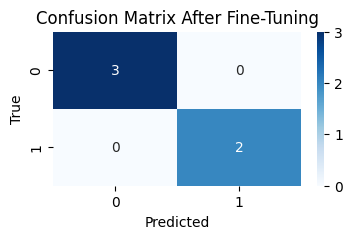

In [83]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GRU, LayerNormalization, Dropout, Dense, Lambda
from tensorflow.keras.models import Model

inputs = Input(shape=(110, 1629))

# First GRU block
x = GRU(384, return_sequences=True)(inputs)
x = LayerNormalization()(x)
x = Dropout(0)(x)

# Second GRU block
x = GRU(256, return_sequences=True)(x)
x = LayerNormalization()(x)
x = Dropout(0.1)(x)

# Third GRU block
x = GRU(128, return_sequences=True)(x)
x = LayerNormalization()(x)

# Attention block
def attention_block(x):
    attention_scores = Dense(1, activation='tanh')(x)
    attention_weights = Lambda(lambda s: tf.nn.softmax(s, axis=1))(attention_scores)
    weighted_sum = Lambda(lambda s: tf.reduce_sum(s[0] * s[1], axis=1))([x, attention_weights])
    return weighted_sum

x = attention_block(x)

# Final dense + output
x = Dense(64, activation='relu')(x)
x = Dropout(0.1)(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.load_weights("/kaggle/working/Best_attention_gru.weights.h5", skip_mismatch = True)

# 5️⃣ Optional: Freeze lower layers for stable initial fine-tuning
for layer in model.layers[:-3]:   # adjust as needed
    layer.trainable = False


# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)


history = model.fit(
    X_train,
    y_train_cat,
    validation_data=(X_val, y_val_cat),
    batch_size=16,
    epochs=70,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Evaluate on training and validation data
train_loss, train_acc = model.evaluate(X_train, y_train_cat, verbose=0)
val_loss, val_acc = model.evaluate(X_val, y_val_cat, verbose=0)

# Predict on validation data
y_val_pred_probs = model.predict(X_val, verbose=0)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)
y_val_true = np.argmax(y_val_cat, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_true, y_val_pred)

Tloss, Tacc = model.evaluate(X_train, y_train_cat, verbose=1)
loss, acc = model.evaluate(X_val, y_val_cat, verbose=1)
print(f"✅ Fine-tuned model Training accuracy: {Tacc*100:.2f}%")
print(f"✅ Fine-tuned model validation accuracy: {acc*100:.2f}%")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix After Fine-Tuning')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [86]:
# Extract training and validation loss from the history (optional)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Print the final training and validation accuracy in the desired format
print(f"Final Training Accuracy: {training_accuracy[-1]:.4f}")
print(f"Final Validation Accuracy: {validation_accuracy[-1]:.4f}")

Final Training Accuracy: 0.9340
Final Validation Accuracy: 0.8516


In [ ]:
!pip install mediapipe

In [62]:
import os
import cv2
import numpy as np
import mediapipe as mp
import random


mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

holistic = mp_holistic.Holistic(static_image_mode=False)

def extract_holistic_landmarks(frame, holistic):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = holistic.process(rgb_frame)

    # Fixed-size vector: 42 hand + 468 face + 33 pose = 543 points × 3 coordinates = 1629 features
    landmark_vector = np.zeros(1629, dtype=np.float32)

    # Hands (42 points: 21 left + 21 right)
    if results.left_hand_landmarks:
        left_hand = np.array([(lm.x, lm.y, lm.z) for lm in results.left_hand_landmarks.landmark]).flatten()
        landmark_vector[:63] = left_hand  # 21 × 3 = 63
    if results.right_hand_landmarks:
        right_hand = np.array([(lm.x, lm.y, lm.z) for lm in results.right_hand_landmarks.landmark]).flatten()
        landmark_vector[63:126] = right_hand  # Next 63

    # Face (468 points)
    if results.face_landmarks:
        face = np.array([(lm.x, lm.y, lm.z) for lm in results.face_landmarks.landmark]).flatten()
        landmark_vector[126:126 + 468*3] = face  # 468 × 3 = 1404

    # Pose (33 points)
    if results.pose_landmarks:
        pose = np.array([(lm.x, lm.y, lm.z) for lm in results.pose_landmarks.landmark]).flatten()
        landmark_vector[126 + 468*3:] = pose  # 33 × 3 = 99

    return landmark_vector

import numpy as np
from scipy.spatial import procrustes

def normalize_landmarks_relative_to_chest(X, epsilon=1e-8, return_bbox=False):
    """
    Apply Procrustes alignment + normalize landmarks relative to chest + bbox.

    Args:
        X: np.ndarray (samples, frames, 1629)
        epsilon: small value to prevent division by zero
        return_bbox: return bounding box info if True

    Returns:
        X_norm: np.ndarray normalized landmarks
        bboxes: (optional) np.ndarray of bounding box info
    """
    X = np.asarray(X, dtype=np.float32)
    if len(X.shape) != 3 or X.shape[2] != 1629:
        raise ValueError(f"Expected shape (samples, frames, 1629), got {X.shape}")
    X_norm = np.zeros_like(X)

    bboxes = [] if return_bbox else None

    # Choose reference points: first frame of first sample
    ref_points = X[0, 0].reshape(543, 3)

    for sample_idx in range(X.shape[0]):
        sample_bboxes = []
        for frame_idx in range(X.shape[1]):
            frame = X[sample_idx, frame_idx]
            points = frame.reshape(543, 3)

            # Procrustes alignment (align current points to reference)
            mtx1, mtx2, disparity = procrustes(ref_points, points)
            aligned_frame = mtx2.flatten()

            # Bounding box
            xs = aligned_frame[::3]
            ys = aligned_frame[1::3]
            zs = aligned_frame[2::3]

            min_x, max_x = np.min(xs), np.max(xs)
            min_y, max_y = np.min(ys), np.max(ys)
            min_z, max_z = np.min(zs), np.max(zs)

            width = max_x - min_x + epsilon
            height = max_y - min_y + epsilon
            depth = max_z - min_z + epsilon

            if return_bbox:
                sample_bboxes.append([min_x, max_x, min_y, max_y, min_z, max_z])

            # Chest center
            lx, ly, lz = aligned_frame[11 * 3], aligned_frame[11 * 3 + 1], aligned_frame[11 * 3 + 2]
            rx, ry, rz = aligned_frame[12 * 3], aligned_frame[12 * 3 + 1], aligned_frame[12 * 3 + 2]
            chest_x = (lx + rx) / 2
            chest_y = (ly + ry) / 2
            chest_z = (lz + rz) / 2

            # Normalize to chest + bbox
            for landmark_idx in range(543):
                base = landmark_idx * 3
                X_norm[sample_idx, frame_idx, base]     = (aligned_frame[base]     - chest_x) / width
                X_norm[sample_idx, frame_idx, base + 1] = (aligned_frame[base + 1] - chest_y) / height
                X_norm[sample_idx, frame_idx, base + 2] = (aligned_frame[base + 2] - chest_z) / depth

        if return_bbox:
            bboxes.append(sample_bboxes)

    if return_bbox:
        return X_norm, np.array(bboxes)
    else:
        return X_norm

# No Normalization function
def no_normalize_landmarks_relative_to_chest(X):
    X = np.asarray(X, dtype=np.float32)
    if len(X.shape) != 3 or X.shape[2] != 1629:
        raise ValueError(f"Expected shape (samples, frames, 1629), got {X.shape}")
    X_norm = np.copy(X)
    '''
    for sample_idx in range(X.shape[0]):
        for frame_idx in range(X.shape[1]):
            frame = X[sample_idx, frame_idx]
            lx, ly, lz = frame[11 * 3], frame[11 * 3 + 1], frame[11 * 3 + 2]
            rx, ry, rz = frame[12 * 3], frame[12 * 3 + 1], frame[12 * 3 + 2]
            chest_x = (lx + rx) / 2
            chest_y = (ly + ry) / 2
            chest_z = (lz + rz) / 2
            for landmark_idx in range(543):
                base = landmark_idx * 3
                X_norm[sample_idx, frame_idx, base] -= chest_x
                X_norm[sample_idx, frame_idx, base + 1] -= chest_y
                X_norm[sample_idx, frame_idx, base + 2] -= chest_z
    '''
    return X_norm

def pad_or_trim_sequence(sequence, min_len=110, max_len=110):
    seq_len = len(sequence)

    # If longer than max_len, trim using frame skipping
    if seq_len > max_len:
        indices = np.linspace(0, seq_len - 1, num=max_len, dtype=int)
        return sequence[indices]

    while len(sequence) < min_len:
        insert_idx = random.randint(0, len(sequence) - 2)  # pick adjacent pair
        frame1 = sequence[insert_idx]
        frame2 = sequence[insert_idx + 1]
        interpolated = (frame1 + frame2) / 2.0

        # Insert the interpolated frame after frame1
        sequence = np.insert(sequence, insert_idx + 1, interpolated, axis=0)

    return sequence

In [63]:
import os
import cv2
import numpy as np
import mediapipe as mp

def process_videos(root_folder, model=None, label_map=None):
    holistic = mp.solutions.holistic.Holistic(static_image_mode=False, min_detection_confidence=0.5)

    if not os.path.isdir(root_folder):
        print(f"🚫 Not a directory: {root_folder}")
        return

    video_files = [
        f for f in os.listdir(root_folder)
        if f.lower().endswith(('.mov', '.mp4', '.avi', '.mkv', '.wmv', '.flv', '.webm'))
    ]

    if not video_files:
        print("⚠️ No video files found.")
        return


    correct = 0
    total = 0
    class_name = os.path.basename(root_folder)

    for video_file in video_files:

        video_path = os.path.join(root_folder, video_file)
        cap = cv2.VideoCapture(video_path)
        video_landmarks = []

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            landmark_vector = extract_holistic_landmarks(frame, holistic)
            video_landmarks.append(landmark_vector)

        cap.release()

        if not video_landmarks:
            continue

        # Now process the full sequence
        video_landmarks = np.array(video_landmarks)  # (num_frames, 1629)

        sequence = pad_or_trim_sequence(video_landmarks, min_len=110, max_len=110)
        sequence = np.expand_dims(sequence, axis=0)  # → shape becomes (1, 110, 1629)
        sequence = normalize_landmarks_relative_to_chest(sequence)

        prediction_probs = model.predict(sequence, verbose=0)  # Shape: (1, num_classes)
        predicted_label_idx = np.argmax(prediction_probs)
        predicted_label = label_map[predicted_label_idx]

        if predicted_label == class_name:
            correct += 1
        total += 1

    accuracy = correct / total if total > 0 else 0
    print(f"\n✅ Accuracy of the label '{class_name}' = {accuracy:.2%}")

    holistic.close()

In [87]:
import pandas as pd

# Load the label mapping from the CSV
label_df = pd.read_csv('/kaggle/input/labling/Normal_label_mapping.csv')
label_map = dict(zip(label_df['Label Index'], label_df['Label Name']))
print(label_map)

# List of input directories  NEED TO CREATE THE TESTING FODLER AGAIN
input_dirs = [
    "/kaggle/input/testing-data/Beautiful",
    "/kaggle/input/include/Adjectives_1of8/Adjectives/5. Beautiful",
    "/kaggle/input/testing-data/Nice",
    "/kaggle/input/include/Adjectives_2of8/Adjectives/9. Nice"
]

for file in input_dirs:
    process_videos(file, model, label_map)

{0: '10. Mean', 1: '11. rich', 2: '14. thin', 3: '15. expensive', 4: '16. cheap', 5: '18. curved', 6: '19. male', 7: '20. female', 8: '21. tight', 9: '22. Restaurant', 10: '24. low', 11: '25. Office', 12: '25. soft', 13: '26. University', 14: '29. clean', 15: '30. dirty', 16: '33. India', 17: '33. dead', 18: '34. alive', 19: '39. famous', 20: '4. sad', 21: '41. you', 22: '42. he', 23: '44. it', 24: '48. Hello', 25: '5. Beautiful', 26: '52. Good afternoon', 27: '53. Good evening', 28: '56. Pleased', 29: '58. Camera', 30: '6. Ugly', 31: '67. Monday', 32: '7. Deaf', 33: '70. Thursday', 34: '71. Friday', 35: '72. Saturday', 36: '75. Yesterday', 37: '8. Blind', 38: '80. Minute', 39: '82. Morning', 40: '83. Afternoon', 41: '84. Evening', 42: '85. Night', 43: '9. Nice', 44: '95. bad'}


W0000 00:00:1751103047.862325   67309 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103047.921574   67309 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103047.927055   67308 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103047.929049   67310 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103047.930014   67309 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103047.953971   67308 inference_feedback_manager.cc:114] Feedback manager 


✅ Accuracy of the label 'Beautiful' = 0.00%


W0000 00:00:1751103106.899707   67517 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103106.968488   67517 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103106.973424   67520 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103106.975177   67518 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103106.978405   67517 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103106.998299   67518 inference_feedback_manager.cc:114] Feedback manager 


✅ Accuracy of the label '5. Beautiful' = 0.00%


W0000 00:00:1751103142.180739   67656 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103142.244621   67656 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103142.249318   67657 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103142.250254   67655 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103142.253528   67656 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103142.274935   67655 inference_feedback_manager.cc:114] Feedback manager 


✅ Accuracy of the label 'Nice' = 0.00%


W0000 00:00:1751103200.649543   67847 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103200.716396   67848 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103200.720490   67849 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103200.723819   67850 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103200.725834   67848 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103200.753449   67849 inference_feedback_manager.cc:114] Feedback manager 


✅ Accuracy of the label '9. Nice' = 0.00%


In [88]:
input_dirs = [
    "/kaggle/input/include/Adjectives_3of8/Adjectives/29. clean"
]
'''
    "/kaggle/input/include/Adjectives_7of8/Adjectives/95. bad",
    "/kaggle/input/include/Days_and_Time_1of3/Days_and_Time/70. Thursday",
    "/kaggle/input/include/Days_and_Time_1of3/Days_and_Time/67. Monday",
    "/kaggle/input/include/Days_and_Time_2of3/Days_and_Time/75. Yesterday",
    "/kaggle/input/include/Days_and_Time_2of3/Days_and_Time/80. Minute",
    "/kaggle/input/include/Days_and_Time_3of3/Days_and_Time/85. Night",
    "/kaggle/input/include/Days_and_Time_3of3/Days_and_Time/82. Morning",
    "/kaggle/input/include/Greetings_1of2/Greetings/52. Good afternoon",
    "/kaggle/input/include/Pronouns_1of2/Pronouns/42. he",
    "/kaggle/input/include/Pronouns_1of2/Pronouns/44. it",
    "/kaggle/input/include/Adjectives_2of8/Adjectives/11. rich",
    "/kaggle/input/include/Adjectives_2of8/Adjectives/21. tight",
    "/kaggle/input/include/Greetings_2of2/Greetings/56. Pleased",
'''

for path in input_dirs:
  process_videos(path, model, label_map)

W0000 00:00:1751103216.302854   67917 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103216.368691   67916 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103216.373106   67915 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103216.377634   67917 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103216.378458   67916 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103216.396875   67915 inference_feedback_manager.cc:114] Feedback manager 


✅ Accuracy of the label '29. clean' = 0.00%


In [89]:
import numpy as np

def compare_landmarks(landmarks1, landmarks2):
    """
    Compare two numpy arrays of shape (sequence_length, features)
    and compute mean, min, max, and range of distances between corresponding rows.
    """
    if landmarks1.shape != landmarks2.shape:
        print("❌ Landmark arrays have different shapes!")
        return

    distances = np.linalg.norm(landmarks1 - landmarks2, axis=1)

    mean_distance = np.mean(distances)
    min_distance = np.min(distances)
    max_distance = np.max(distances)
    range_distance = max_distance - min_distance

    print(f"\n✅ Summary:")
    print(f"Mean distance: {mean_distance:.6f}")
    print(f"Min distance : {min_distance:.6f}")
    print(f"Max distance : {max_distance:.6f}")
    print(f"Range        : {range_distance:.6f}")

    return distances, mean_distance, min_distance, max_distance, range_distance


In [90]:
# prompt: write a code to extract the landmarks using the existing code by passing only the video

def extract_landmarks_from_video(video_path):
    """
    Extracts holistic landmarks from a single video file.

    Args:
        video_path (str): Path to the video file.

    Returns:
        list: A list of landmark vectors, one for each frame.
              Returns None if the video cannot be opened or has no frames.
    """
    holistic = mp.solutions.holistic.Holistic(static_image_mode=False, min_detection_confidence=0.5)
    cap = cv2.VideoCapture(video_path)
    video_landmarks = []

    if not cap.isOpened():
        print(f"🚫 Error: Could not open video file: {video_path}")
        holistic.close()
        return None

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        landmark_vector = extract_holistic_landmarks(frame, holistic)
        video_landmarks.append(landmark_vector)

    cap.release()
    holistic.close()

    if not video_landmarks:
        print(f"⚠️ No frames or landmarks extracted from video: {video_path}")
        return None

    return video_landmarks

# Example usage:
# Assuming you have a video file named 'my_video.mp4'
# Replace 'my_video.mp4' with the actual path to your video file
# video_file_path = '/kaggle/input/testing-data/Beautfiul/Beautiful (2).mp4' # Example path from your code
# extracted_landmarks = extract_landmarks_from_video(video_file_path)

# if extracted_landmarks:
#     print(f"Successfully extracted landmarks from {video_file_path}.")
#     print(f"Number of frames with landmarks: {len(extracted_landmarks)}")
#     if extracted_landmarks[0] is not None:
#         print(f"Shape of each landmark vector: {extracted_landmarks[0].shape}")
# else:
#     print(f"Failed to extract landmarks from {video_file_path}.")



In [91]:

input1 = r"/kaggle/input/testing-data/Beautiful/Beautiful_1.mp4"
orginal1 = r"/kaggle/input/include/Adjectives_1of8/Adjectives/5. Beautiful/MVI_9569.MOV"
input2 = r"/kaggle/input/testing-data/Nice/Nice_1.mp4"
orginal2 = r"/kaggle/input/include/Adjectives_2of8/Adjectives/9. Nice/MVI_9588.MOV"

input1_landmark = extract_landmarks_from_video(input1)
input2_landmark = extract_landmarks_from_video(input2)
orginal1_landmark = extract_landmarks_from_video(orginal1)
orginal2_landmark = extract_landmarks_from_video(orginal2)

pad_input1_landmark = pad_or_trim_sequence(input1_landmark)
pad_input2_landmark = pad_or_trim_sequence(input2_landmark)
pad_orginal1_landmark = pad_or_trim_sequence(orginal1_landmark)
pad_orginal2_landmark = pad_or_trim_sequence(orginal2_landmark)

normal_input1_landmark = normalize_landmarks_relative_to_chest(np.expand_dims(pad_input1_landmark, axis=0))
normal_orginal1_landmark = normalize_landmarks_relative_to_chest(np.expand_dims(pad_orginal1_landmark, axis=0))
normal_input2_landmark = normalize_landmarks_relative_to_chest(np.expand_dims(pad_input2_landmark, axis=0))
normal_orginal2_landmark = normalize_landmarks_relative_to_chest(np.expand_dims(pad_orginal2_landmark, axis=0))


W0000 00:00:1751103249.386958   68053 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103249.451620   68053 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103249.455868   68055 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103249.456353   68054 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103249.456890   68056 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1751103249.478021   68054 inference_feedback_manager.cc:114] Feedback manager 

In [92]:
compare_landmarks(normal_input2_landmark[0], normal_orginal2_landmark[0])
#compare_landmarks(pad_input2_landmark, pad_orginal2_landmark)


✅ Summary:
Mean distance: 10.133282
Min distance : 2.538305
Max distance : 18.808592
Range        : 16.270287


(array([ 2.5383046,  2.5414984,  2.6049945,  2.6394463,  2.6454015,
         2.7915025,  2.8705583, 13.913212 , 13.892501 , 14.042857 ,
        14.120962 , 14.123371 , 14.125357 , 12.348548 , 12.978223 ,
        13.271848 , 13.336142 , 13.130489 , 13.162878 , 13.190039 ,
        13.236265 , 13.303201 , 13.339152 , 13.329734 , 13.371981 ,
        13.378784 , 13.414434 , 13.433137 , 13.460346 , 13.46436  ,
        13.42225  , 13.403344 , 13.463096 , 13.496995 , 13.520677 ,
        13.50937  , 13.498179 , 13.496059 , 13.497638 , 13.4606905,
        13.427079 , 13.439045 , 13.497701 , 13.509554 , 13.511113 ,
        13.514708 , 13.447302 , 13.595082 , 13.660773 , 13.670892 ,
        13.661929 , 13.662417 , 13.656196 , 13.6356325, 13.643418 ,
        13.6504965, 13.565976 , 13.42954  , 13.324369 , 13.157275 ,
        13.189625 , 13.221238 , 13.1936865, 13.167348 , 13.17349  ,
        13.181773 , 13.245578 , 13.20022  , 13.173817 , 13.177692 ,
        13.222426 , 13.257234 , 13.164196 , 12.8

In [94]:
import numpy as np
print(f"Sequence shape before prediction: {normal_input1_landmark.shape}") # Debug print
# Add batch dimension to the input data
prediction_probs = model.predict(np.expand_dims(normal_input1_landmark[0], axis=0), verbose=0)  # Shape: (1, num_classes)
print(f"Prediction probabilities shape: {prediction_probs.shape}") # Debug print
print(f"Prediction probabilities: {prediction_probs}") # Debug print
predicted_label_idx = np.argmax(prediction_probs)
print(f"Predicted label index: {predicted_label_idx}") # Debug print
predicted_label = label_map[predicted_label_idx]
print(f"Predicted label: {predicted_label}") # Debug print


print(f"Sequence shape before prediction: {normal_orginal1_landmark.shape}") # Debug print
# Add batch dimension to the input data
prediction_probs = model.predict(np.expand_dims(normal_orginal1_landmark[0], axis=0), verbose=0)  # Shape: (1, num_classes)
print(f"Prediction probabilities shape: {prediction_probs.shape}") # Debug print
print(f"Prediction probabilities: {prediction_probs}") # Debug print
predicted_label_idx = np.argmax(prediction_probs)
print(f"Predicted label index: {predicted_label_idx}") # Debug print
predicted_label = label_map[predicted_label_idx]
print(f"Predicted label: {predicted_label}") # Debug print

Sequence shape before prediction: (1, 110, 1629)
Prediction probabilities shape: (1, 2)
Prediction probabilities: [[0.9345144  0.06548554]]
Predicted label index: 0
Predicted label: 10. Mean
Sequence shape before prediction: (1, 110, 1629)
Prediction probabilities shape: (1, 2)
Prediction probabilities: [[0.12423374 0.8757663 ]]
Predicted label index: 1
Predicted label: 11. rich


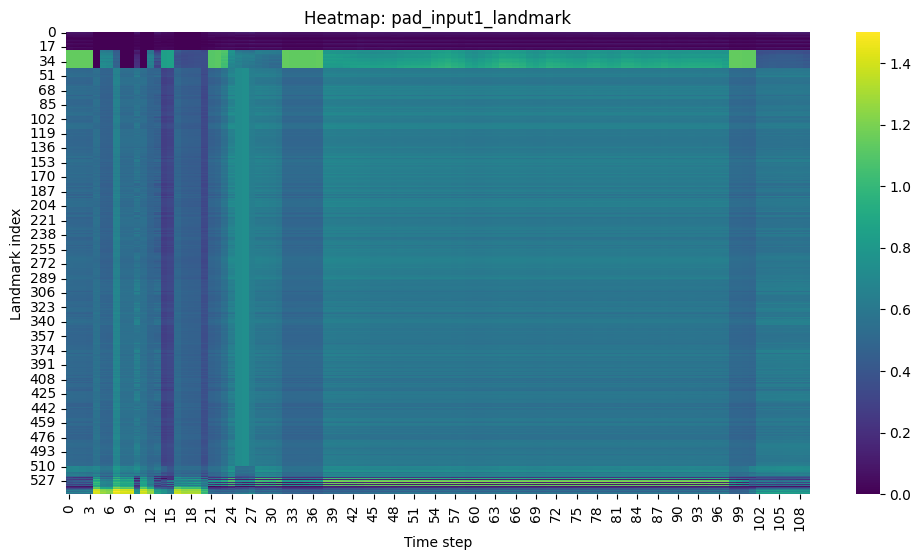

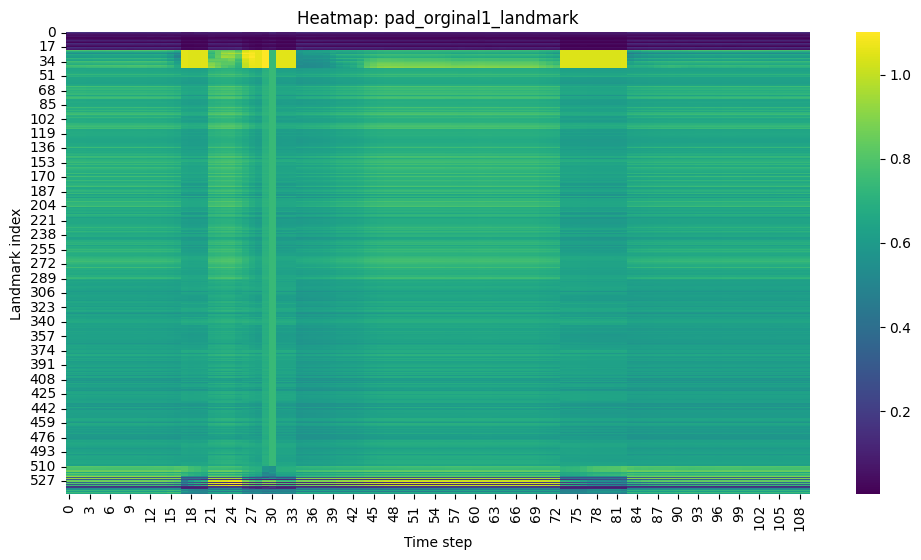

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_landmark_heatmap(sequence, title="Landmark Heatmap"):
    """
    Plots a heatmap of landmark distances (or magnitude) over time.
    sequence: (timesteps, 1629)
    """
    sequence = np.array(sequence)
    timesteps = sequence.shape[0]
    num_points = sequence.shape[1] // 3

    # Reshape to (timesteps, 543, 3)
    reshaped = sequence.reshape(timesteps, num_points, 3)

    # Compute magnitude at each time step for each landmark
    magnitude = np.linalg.norm(reshaped, axis=2)  # (timesteps, 543)

    plt.figure(figsize=(12, 6))
    sns.heatmap(magnitude.T, cmap="viridis", cbar=True)
    plt.title(title)
    plt.xlabel("Time step")
    plt.ylabel("Landmark index")
    plt.show()

# Example usage:
plot_landmark_heatmap(normal_input1_landmark[0], title="Heatmap: pad_input1_landmark")
plot_landmark_heatmap(normal_orginal1_landmark[0], title="Heatmap: pad_orginal1_landmark")


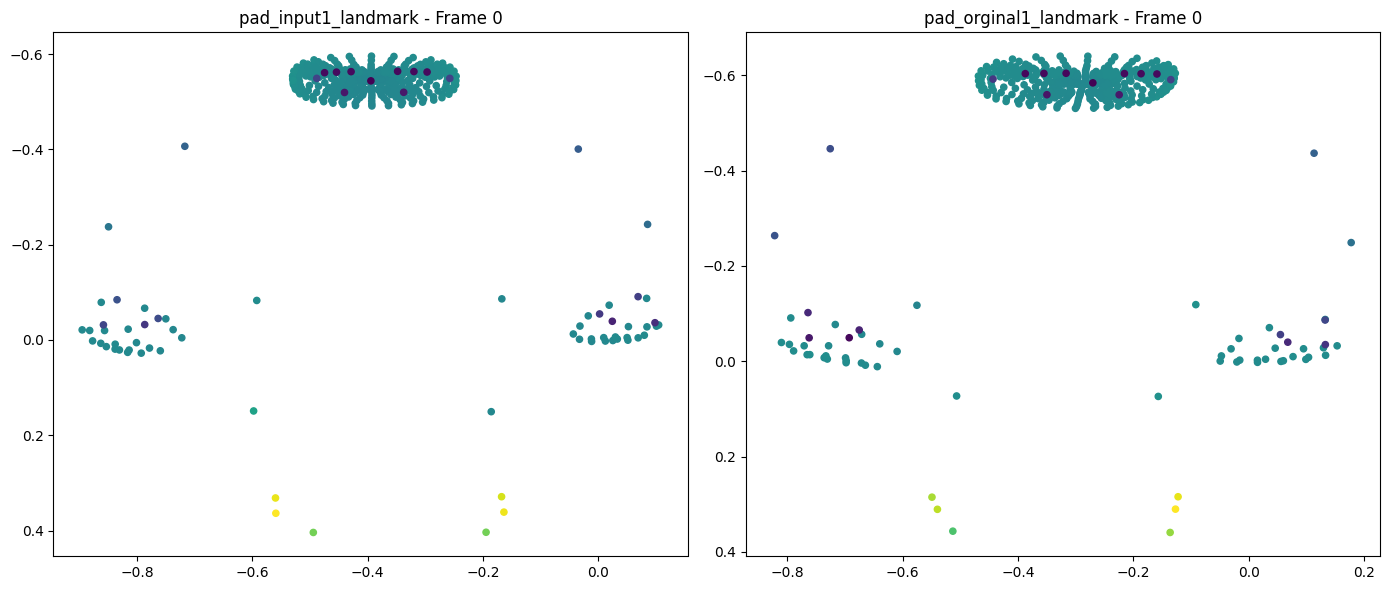

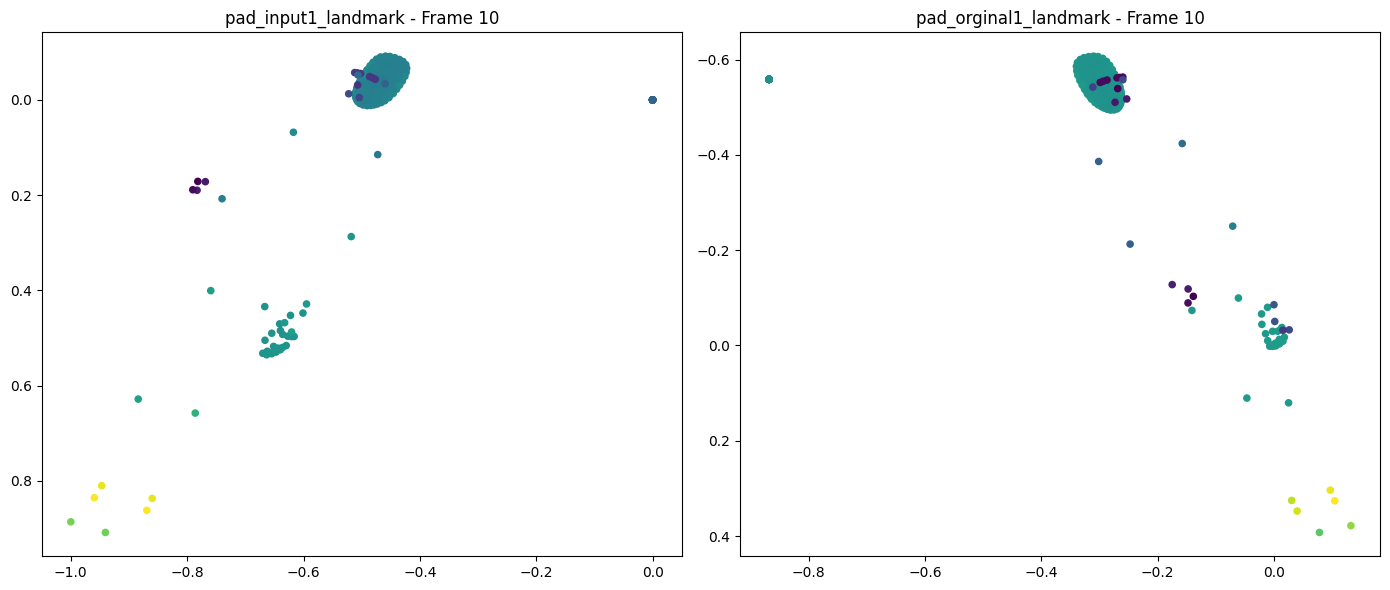

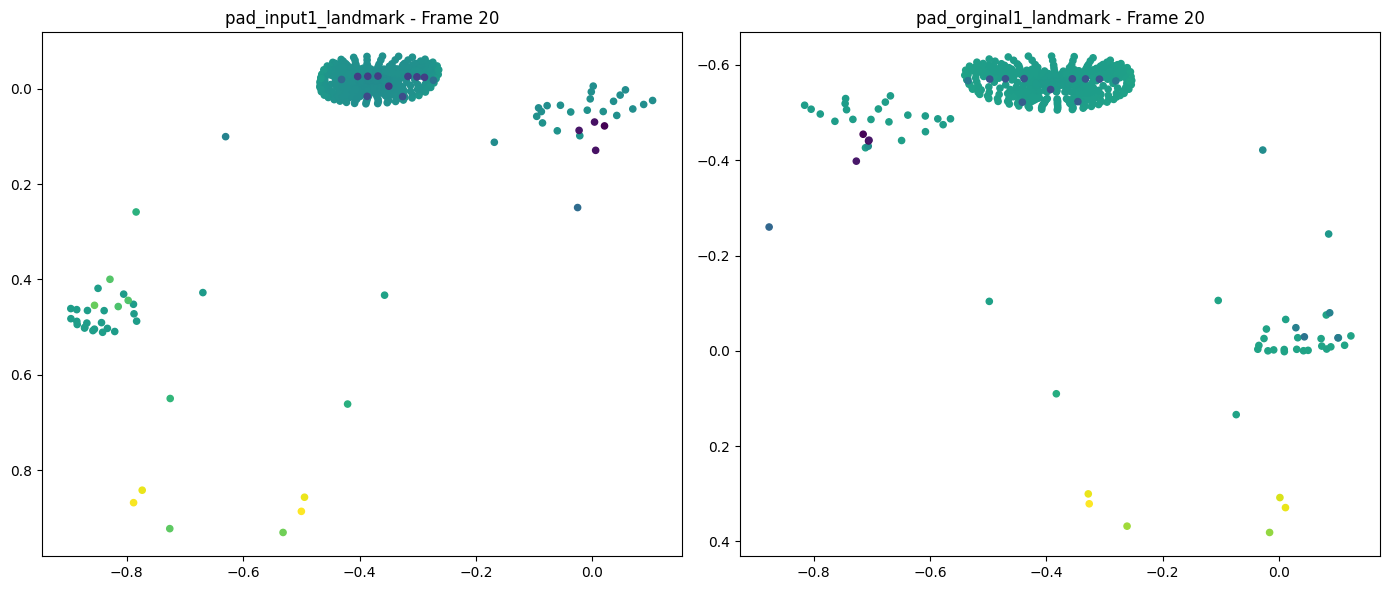

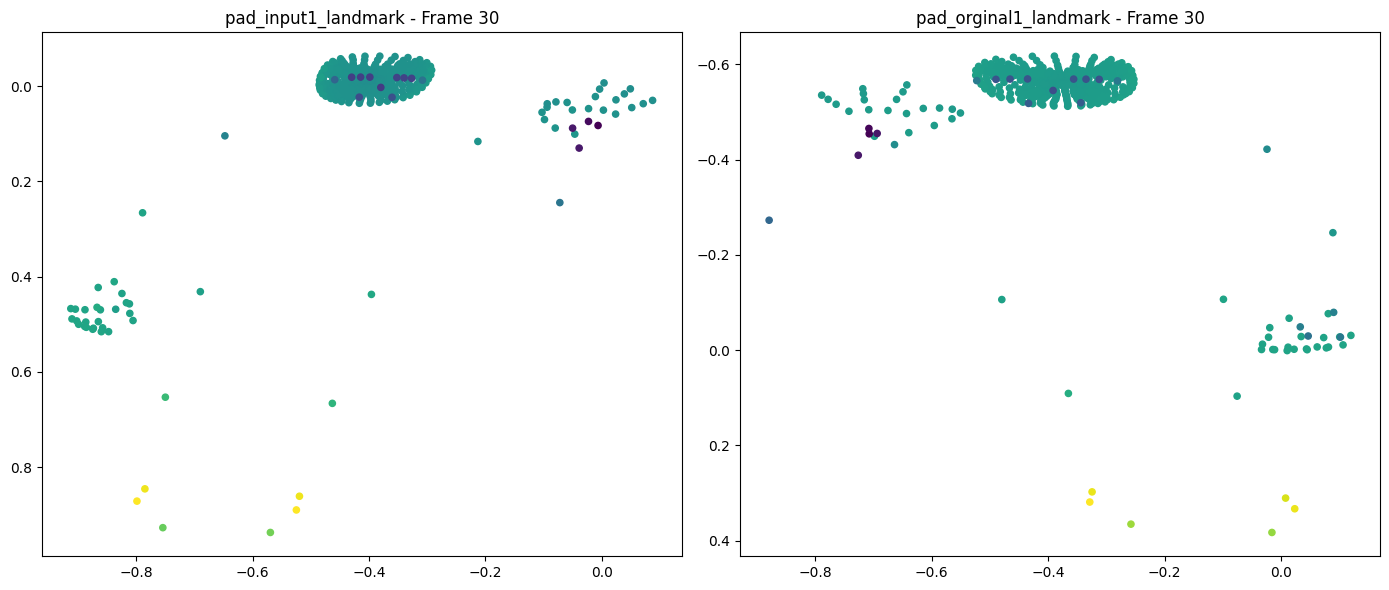

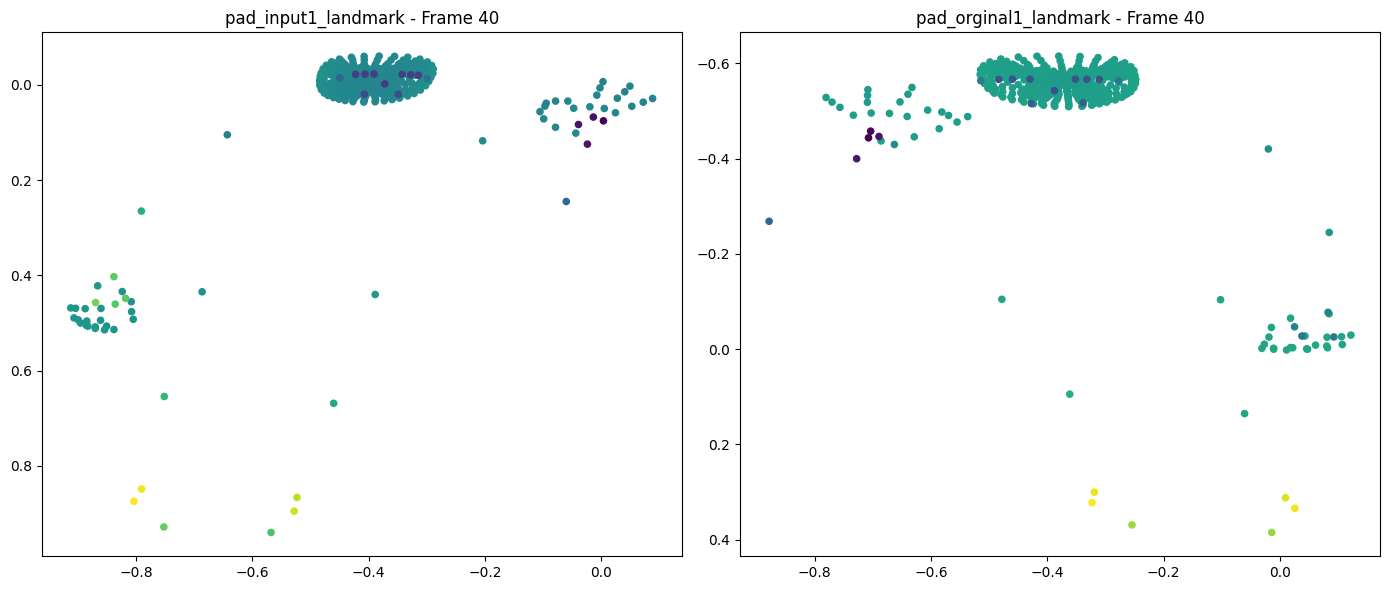

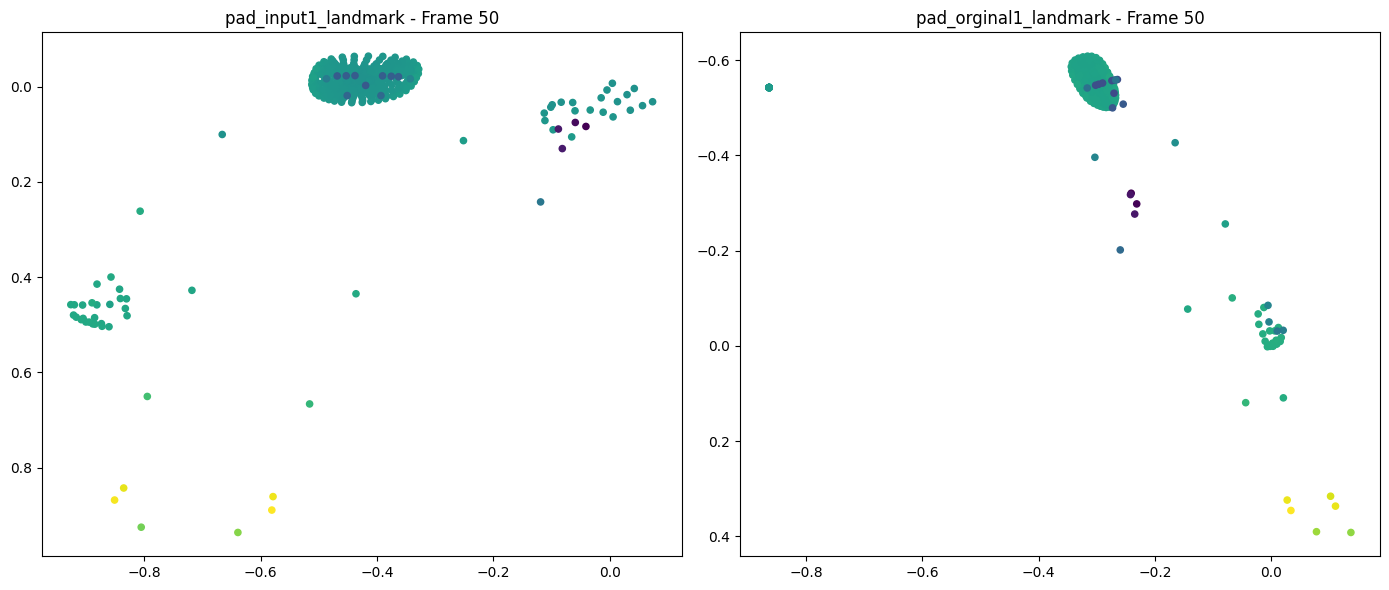

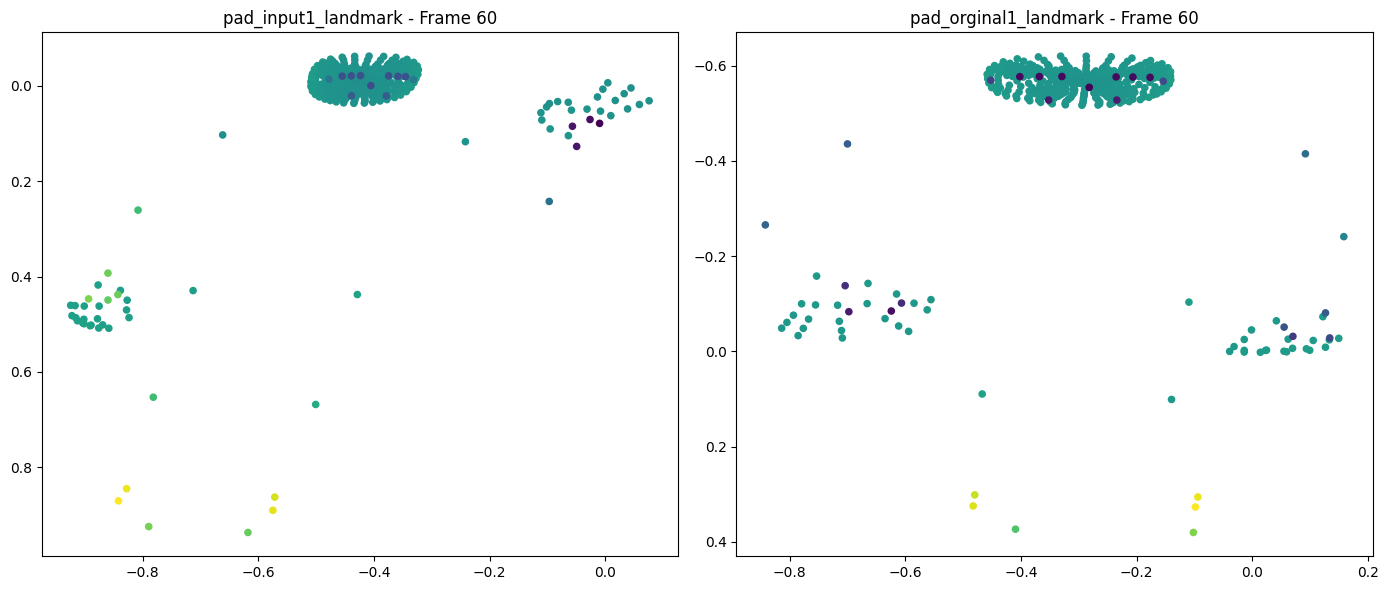

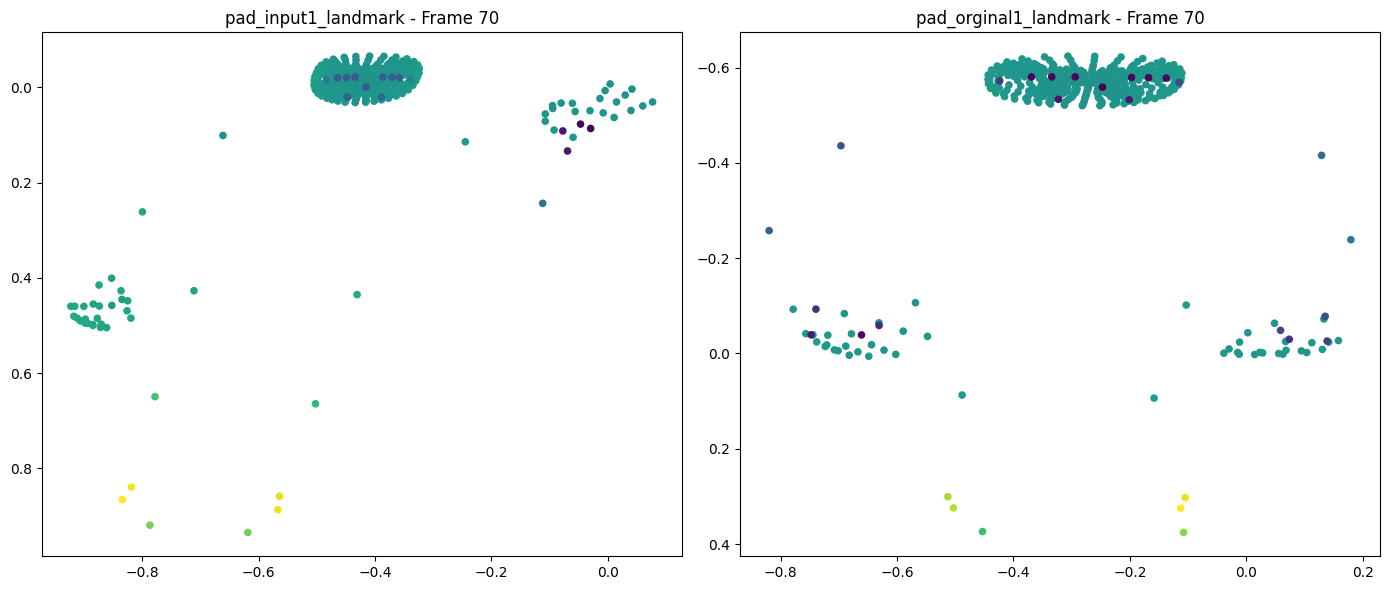

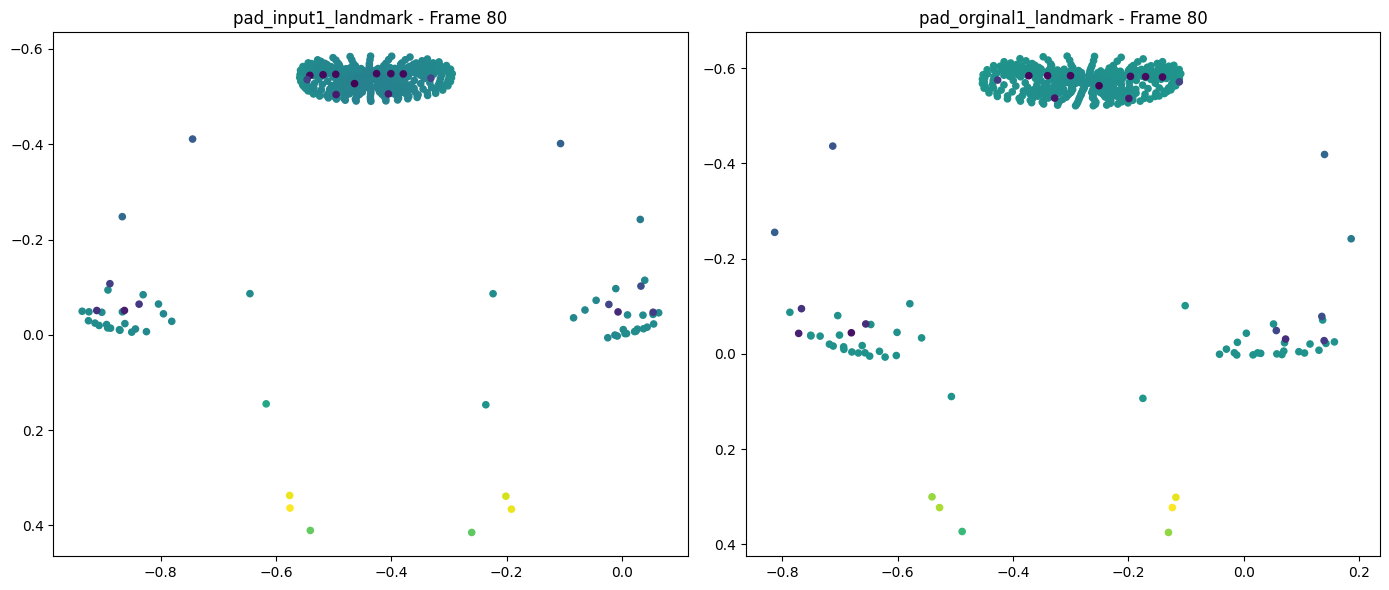

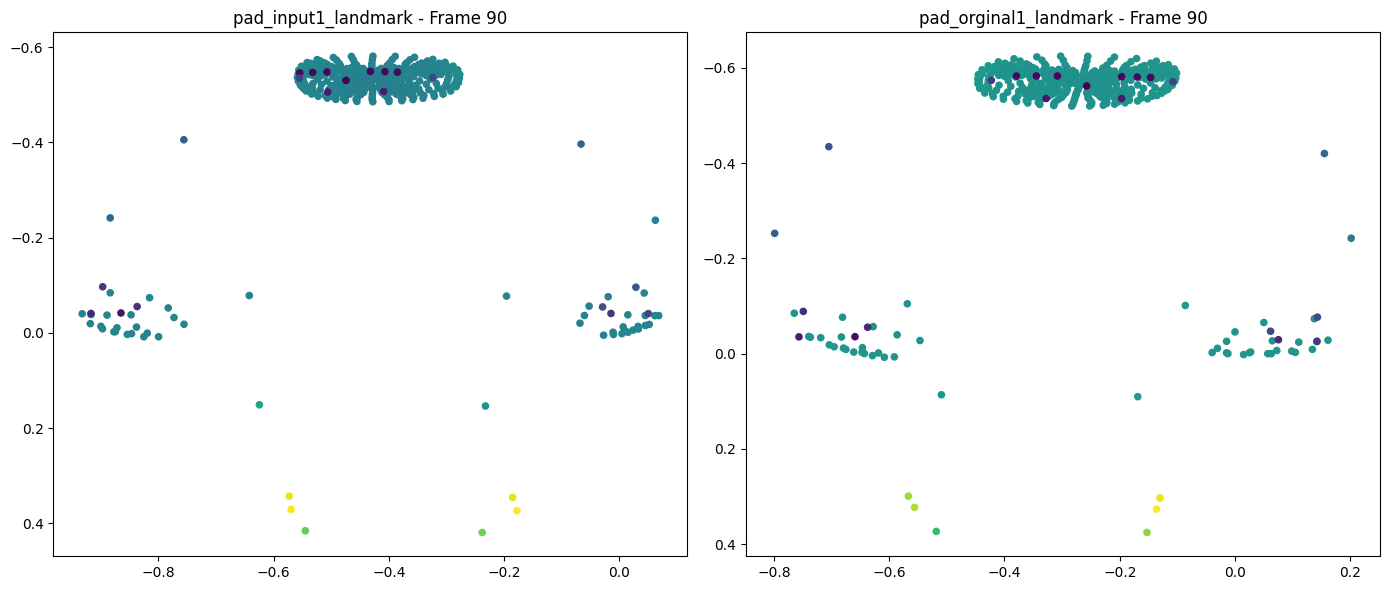

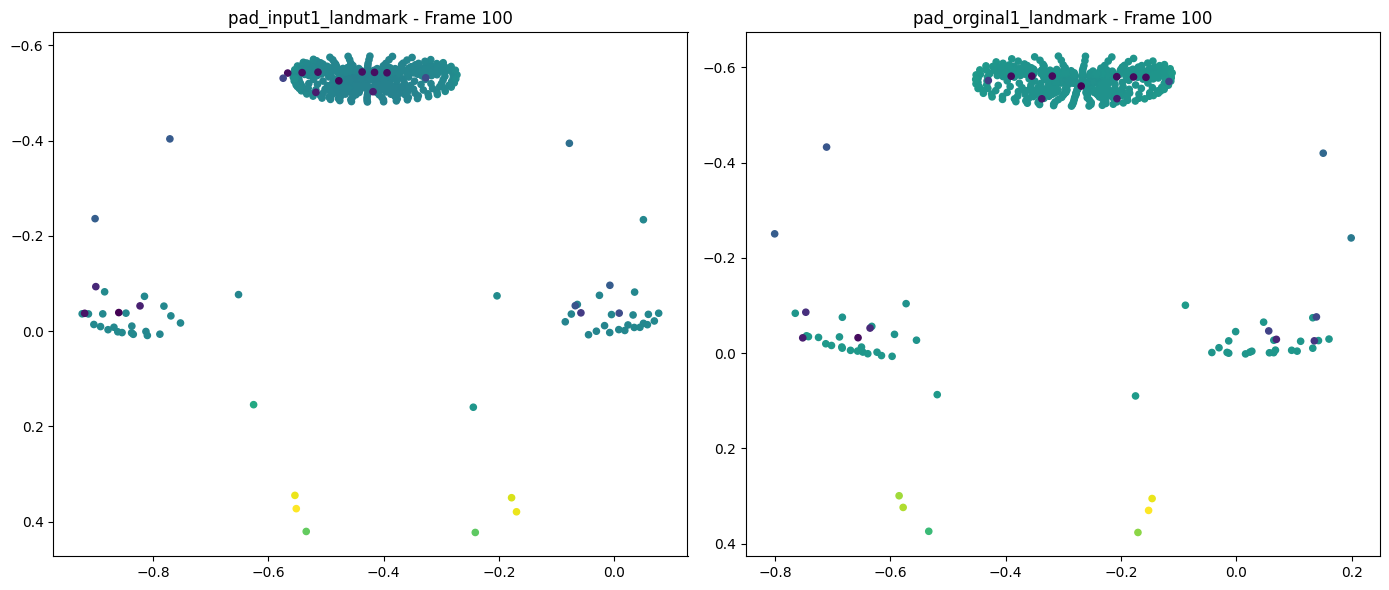

In [97]:
import matplotlib.pyplot as plt
import numpy as np

def plot_landmark_scatter_side_by_side(seq1, seq2, frame_idx, title1="Sequence 1", title2="Sequence 2"):
    """
    Plots side-by-side scatter plots for two sequences at a specific frame.
    seq1, seq2: (timesteps, 1629)
    """
    seq1 = np.array(seq1)
    seq2 = np.array(seq2)
    num_points = seq1.shape[1] // 3

    # Extract frame data
    frame1 = seq1[frame_idx]
    frame2 = seq2[frame_idx]

    x1, y1, z1 = frame1[::3], frame1[1::3], frame1[2::3]
    x2, y2, z2 = frame2[::3], frame2[1::3], frame2[2::3]

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # First sequence
    sc1 = axs[0].scatter(x1, y1, c=z1, cmap='viridis', s=20)
    axs[0].invert_yaxis()
    axs[0].set_title(f"{title1} - Frame {frame_idx}")

    # Second sequence
    sc2 = axs[1].scatter(x2, y2, c=z2, cmap='viridis', s=20)
    axs[1].invert_yaxis()
    axs[1].set_title(f"{title2} - Frame {frame_idx}")


    plt.tight_layout()
    plt.show()

# Example usage for frames at intervals
for frame_idx in range(0, 110, 10):
    plot_landmark_scatter_side_by_side(normal_input2_landmark[0], normal_orginal2_landmark[0], frame_idx,
                                       title1="pad_input1_landmark",
                                       title2="pad_orginal1_landmark")


In [59]:
# prompt: /kaggle/input/include/Greetings_1of2/Greetings/48. Hello/MVI_0029.MOV
# checl the number of frames and total time of the video

video_path = "/kaggle/input/include/Greetings_1of2/Greetings/48. Hello/MVI_0029.MOV"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(f"Error: Could not open video file: {video_path}")
else:
    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    if fps > 0:
        duration = num_frames / fps
        print(f"Video: {video_path}")
        print(f"Number of frames: {num_frames}")
        print(f"Frames per second (FPS): {fps:.2f}")
        print(f"Total duration: {duration:.2f} seconds")
    else:
        print(f"Error: Could not get FPS for video: {video_path}")
        print(f"Number of frames: {num_frames}")

cap.release()


Video: /kaggle/input/include/Greetings_1of2/Greetings/48. Hello/MVI_0029.MOV
Number of frames: 63
Frames per second (FPS): 25.00
Total duration: 2.52 seconds
